<a href="https://colab.research.google.com/github/joacocresp-dotcom/ProyectoParteIIICrespi/blob/main/proyectodsPartelIIICrespi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Entrega Final - Visualizacion en Python**
___

Primera Entrega: 23/10/2025

Alumno: Joaquin Crespi

Curso: 77695
___

**Abstract**

En el presente informe se desarrolla un análisis exploratorio y descriptivo del dataset Shoe Prices, extraído de Kaggle, con el propósito de interpretar su información desde una perspectiva visual y numérica. Se busca validar hipótesis preestablecidas, generar datos relevantes y detectar tanto insights (patrones y tendencias) como outsights (aspectos inesperados o menos comunes) que aporten valor en la toma de decisiones estratégicas dentro del mercado de calzado.

La metodología empleada incluyó la carga y exploración inicial del dataset, verificando la ausencia de valores perdidos para asegurar la calidad de los datos. Se realizó un análisis de la distribución de las principales variables categóricas, como la cantidad de filas por marca y los tipos de calzado más frecuentes, utilizando tablas y gráficos de conteo. Se profundizó en la diversidad de la oferta de cada marca analizando el número de modelos únicos.

Asimismo, se exploraron las relaciones multivariadas entre variables clave mediante tablas de contingencia y gráficos de barras agrupadas, como la distribución de género por marca y por tipo de calzado, identificando posibles segmentaciones del mercado. La distribución de precios fue examinada a través de un histograma para comprender los rangos de precios más comunes.

Los análisis preliminares han permitido visualizar la concentración del mercado en ciertos tipos de calzado (running, casual) y marcas, así como observar patrones en la distribución de modelos por marca y las proporciones de género dentro de diferentes categorías. Estos hallazgos constituyen una base sólida para la validación de las hipótesis planteadas y la identificación de áreas de interés para futuras investigaciones y estrategias comerciales.



**Herramientas:**

A nivel teórico, se aplicarán técnicas de análisis univariado, bivariado y multivariado, con el fin de obtener una visión integral de los datos. Para ello, se utilizarán herramientas de manipulación y visualización como Pandas, Matplotlib y Seaborn, que facilitan la exploración de patrones, tendencias y relaciones entre variables.

**Hipótesis 1:**

El mercado de calzado representado en este dataset presenta una clara polarización en su estructura de precios, donde los tipos de calzado orientados al rendimiento y a las marcas líderes se posicionan consistentemente en rangos de precio superiores, mientras que los tipos casuales y lifestyle, junto con marcas con menor diversidad de modelos, se concentran en segmentos de precio medio a bajo, lo que sugiere que el valor percibido y la estrategia de marca están fuertemente ligados al uso específico y al posicionamiento de la empresa en el mercado.

# Hipotesis 2:

Se postula que los tipos de calzado deportivo (como Running, Basketball, Training, etc.) que incorporan materiales considerados 'premium' o de alta tecnología (como Primeknit, Flyknit, ciertas variantes de cuero especializado, o materiales avanzados para rendimiento) tendrán consistentemente precios promedio significativamente más altos que aquellos calzados deportivos que utilizan materiales más convencionales (como lona, malla estándar o cuero básico). Esto sugiere que la combinación de un uso orientado al rendimiento y la calidad percibida del material influye directamente en el posicionamiento de precio en el mercado.

**Dataframe:**

Se utiliza la libreria kaggle para generar una ruta de acceso a los datos de "shoes price dataset", a un ruta local. En el cual luego podremos hacer otro codigo haciendo referencia a dicha tabla y podremos traer el Dataframe.

In [42]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'shoe-prices-dataset' dataset.
Path to dataset files: /kaggle/input/shoe-prices-dataset


In [43]:
import os

# Lista los archivos y directorios dentro de la ruta de descarga
print("Archivos en la ruta de descarga:")
for root, dirs, files in os.walk(path):
    print(f"Directorio: {root}")
    for file in files:
        print(f"  Archivo: {file}")

Archivos en la ruta de descarga:
Directorio: /kaggle/input/shoe-prices-dataset
  Archivo: Shoe prices.csv


In [44]:
import kagglehub
import pandas as pd
import os

# Descargar la última versión
path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")

print("Path to dataset files:", path)

# Cargar el archivo principal del dataset
# Construir la ruta completa al archivo CSV
# Corregimos el nombre del archivo según el listado
file_path = os.path.join(path, "Shoe prices.csv")
df = pd.read_csv(file_path)

# --- Mostrar el total de filas ---
print(f"\nTotal de filas en el DataFrame: {len(df)}")
# --- Fin de la adición ---

# # Mostrar los nombres de las columnas por separado - ELIMINADO
# print("\nNombres de las columnas:")
# for col in df.columns:
#     print(col)

# --- Enumerar la cantidad de filas por marcas, agregar total y porcentaje ---
print("\nCantidad de filas por marca:")
brand_counts = df['Brand'].value_counts().reset_index()
brand_counts.columns = ['Brand', 'Cantidad']

# Calcular porcentaje
total_rows = brand_counts['Cantidad'].sum()
brand_counts['Porcentaje (%)'] = (brand_counts['Cantidad'] / total_rows * 100).map("{:.2f}%".format)

# Agregar fila total
total_row = pd.DataFrame({'Brand': ['Total'], 'Cantidad': [total_rows], 'Porcentaje (%)': ['100.00%']})
brand_counts = pd.concat([brand_counts, total_row], ignore_index=True)

display(brand_counts.style.hide(axis="index"))
# --- Fin de la modificación ---


display(df.head())

Using Colab cache for faster access to the 'shoe-prices-dataset' dataset.
Path to dataset files: /kaggle/input/shoe-prices-dataset

Total de filas en el DataFrame: 1006

Cantidad de filas por marca:


Brand,Cantidad,Porcentaje (%)
Nike,118,11.73%
Adidas,100,9.94%
Reebok,100,9.94%
Converse,100,9.94%
Puma,100,9.94%
Vans,100,9.94%
New Balance,100,9.94%
Asics,100,9.94%
Fila,99,9.84%
Skechers,89,8.85%


,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,Air Jordan 1,Basketball,Men,US 10,Red/Black,Leather,$170.00
1,Adidas,Ultra Boost 21,Running,Men,US 9.5,Black,Primeknit,$180.00
2,Reebok,Classic Leather,Casual,Men,US 11,White,Leather,$75.00
3,Converse,Chuck Taylor,Casual,Women,US 8,Navy,Canvas,$55.00
4,Puma,Future Rider,Lifestyle,Women,US 7.5,Pink,Mesh,$80.00





Este conjunto de datos contiene información sobre las ventas de zapatos en una región particular que la vamos a denominar Buenos Aires. Los datos incluyen información sobre la marca, el modelo, el tipo de zapato, el género, la talla, el color, el material y el precio.

Brand (Marca):

 La marca del zapato, como Nike, Adidas o Reebok.

Model (Modelo):

 El nombre o número de modelo específico del zapato, como Air Jordan 1, Ultra Boost 21 o Classic Leather.

Type (Tipo):

 El tipo de zapato, como de correr (running), casual o de skate. Esta columna describe el uso o función previsto del zapato.

Gender (Género):

 El género para el que está diseñado el zapato, como hombres (men), mujeres (women) o unisex. Esta columna especifica el público objetivo del zapato.

Size (Talla):

 La talla del zapato, utilizando la numeración de EE. UU. Esta columna indica la longitud del zapato en pulgadas o centímetros.

Color (Color):

 El color exterior del zapato. Esta columna describe el color predominante o la
combinación de colores del zapato.

Material (Material):

 El material principal del zapato, como cuero (leather), malla (mesh) o gamuza (suede). Esta columna indica el material que constituye la mayor parte de la construcción del zapato.

Price (USD) (Precio en USD):

 El precio del zapato, en dólares estadounidenses. Esta columna especifica el costo de compra del zapato.





In [45]:
# Obtener la lista de marcas únicas
unique_brands = df['Brand'].unique()

print("Lista de marcas únicas:")
for brand in unique_brands:
    print(brand)

Lista de marcas únicas:
Nike
Adidas
Reebok
Converse
Puma
Vans
New Balance
Asics
Fila
Skechers


Es importante podes saber que cuales son los analizados en este trabajo es por eso que generamos un codigo en el cual traemos las marcas que estan presentes.

In [46]:
## Vamos a chequear los Missing Values

missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0


Chequeamos de no tener valores nulos dentro de nuestro Dataset

Using Colab cache for faster access to the 'shoe-prices-dataset' dataset.


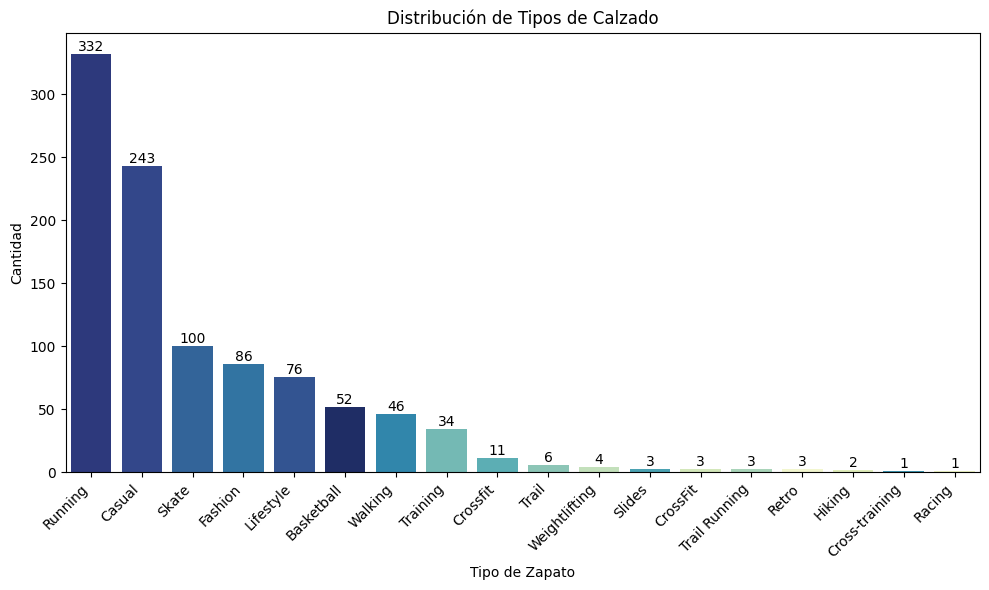

In [47]:
import kagglehub
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Descargar la última versión (si no se ha hecho ya)
# Este paso puede ser redundante si ya se ejecutó la celda de descarga,
# pero asegura que 'path' esté definido.
path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")

# Construir la ruta completa al archivo CSV (usando el nombre correcto)
file_path = os.path.join(path, "Shoe prices.csv")

# Cargar el DataFrame si aún no está definido
if 'df' not in locals() and 'df' not in globals():
    df = pd.read_csv(file_path)

# Ahora que 'df' está definido, podemos usarlo para el gráfico
order = df['Type'].value_counts().index
plt.figure(figsize=(10, 6)) # Opcional: ajusta el tamaño del gráfico
# Usar la paleta 'YlGnBu' INVERTIDA y guardar los ejes para añadir etiquetas
# Seguir sugerencia de Future warning: usar hue=df['Type'] y legend=False
ax = sns.countplot(x='Type', data=df, order=order, palette="YlGnBu_r", hue=df['Type'], legend=False) # CAMBIAR paleta a 'YlGnBu_r' (invertida) y añadir hue/legend

plt.title('Distribución de Tipos de Calzado') # Puedes ajustar el título si es necesario
plt.xlabel('Tipo de Zapato')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje x si son largas

# Agregar etiquetas de datos a las barras
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se corten
plt.show()

El gráfico muestra que los tipos de zapatos más frecuentes corresponden a categorías como running y casual, mientras que otros, como skate o formal, tienen menor representación. Esto sugiere que el mercado analizado se orienta principalmente hacia calzado deportivo y de uso cotidiano, lo cual puede estar alineado con las preferencias de consumo actuales. Este hallazgo preliminar es relevante para nuestra hipótesis sobre, al confirmar la predominancia de los segmentos Running y Casual en la oferta.

In [48]:
import pandas as pd

# Crear el dataframe original
data = {
    "Type": ["Running","Casual","Skate","Fashion","Lifestyle","Basketball","Walking",
             "Training","Crossfit","Trail","Weightlifting","Slides","CrossFit",
             "Trail Running","Retro","Hiking","Cross-training","Racing"],
    "Cantidad": [332,243,100,86,76,52,46,34,11,6,4,3,3,3,3,2,1,1],
    "Porcentaje": [33.00,24.16,9.94,8.55,7.55,5.17,4.57,3.38,1.09,0.60,
                   0.40,0.30,0.30,0.30,0.30,0.20,0.10,0.10]
}

df_types = pd.DataFrame(data)

# Función de segmentación
def segmentar(p):
    if p >= 10:
        return "Alta"
    elif p >= 4:
        return "Media"
    else:
        return "Baja"

# Crear columna de segmentación
df_types["Categoria"] = df_types["Porcentaje"].apply(segmentar)

# Formatear la columna porcentaje con el símbolo %
df_types["Porcentaje (%)"] = df_types["Porcentaje"].map("{:.2f}%".format)

# Reordenar columnas para la tabla final
df_types = df_types[["Type","Cantidad","Porcentaje (%)","Categoria"]]

# ---- Tabla 1: segmentada por tipo de zapato ----
print("📊 Distribución de Tipos de Zapatos (Cantidad, Porcentaje y Categoría):")
display(df_types)

# ---- Tabla 2: resumen por categoría ----
resumen = (
    df_types.groupby("Categoria")["Cantidad"]
    .sum()
    .reset_index()
    .sort_values(by="Cantidad", ascending=False)
)

# Calcular porcentaje sobre el total
total = resumen["Cantidad"].sum()
resumen["Porcentaje (%)"] = (resumen["Cantidad"] / total * 100).map("{:.2f}%".format)

print("\n📌 Resumen por Categoría (ordenado de mayor a menor):")
display(resumen)


📊 Distribución de Tipos de Zapatos (Cantidad, Porcentaje y Categoría):


,Type,Cantidad,Porcentaje (%),Categoria
0,Running,332,33.00%,Alta
1,Casual,243,24.16%,Alta
2,Skate,100,9.94%,Media
3,Fashion,86,8.55%,Media
4,Lifestyle,76,7.55%,Media
5,Basketball,52,5.17%,Media
6,Walking,46,4.57%,Media
7,Training,34,3.38%,Baja
8,Crossfit,11,1.09%,Baja
9,Trail,6,0.60%,Baja



📌 Resumen por Categoría (ordenado de mayor a menor):


,Categoria,Cantidad,Porcentaje (%)
0,Alta,575,57.16%
2,Media,360,35.79%
1,Baja,71,7.06%


Del análisis realizado se observa que el mercado presenta una clara concentración en las categorías de mayor participación, donde los segmentos Running y Casual reúnen más de la mitad de la demanda total (57,16%). Esto refleja la preferencia de los consumidores por productos asociados tanto al rendimiento deportivo como al uso cotidiano, consolidando a estas tipologías como pilares fundamentales del mercado.

En segundo lugar, las categorías de participación media alcanzan un 35,79%, lo que evidencia la existencia de un grupo significativo de consumidores que priorizan aspectos vinculados a la moda, el estilo de vida o deportes específicos como el skate y el básquet. Este segmento intermedio constituye un espacio estratégico para la diferenciación y la construcción de identidad de marca.

Por último, las categorías de menor peso representan apenas el 7,06% del total, lo que indica que los nichos especializados (como trail, crossfit o weightlifting) tienen una incidencia reducida. No obstante, estos pueden ofrecer oportunidades de posicionamiento en mercados selectos y de fidelización de consumidores con intereses muy específicos.

En conclusión, el mercado se encuentra polarizado: altamente concentrado en dos segmentos dominantes, complementado por un grupo intermedio relevante y un conjunto reducido de nichos especializados. Este escenario sugiere que las marcas que busquen competitividad deberán asegurar una fuerte presencia en Running y Casual, al tiempo que aprovechan el potencial de diferenciación que ofrecen las categorías de participación media.

In [49]:
# Agrupar por 'Brand' y contar los modelos únicos
models_per_brand = df.groupby('Brand')['Model'].nunique().reset_index()
models_per_brand.columns = ['Brand', 'Numero de Modelos']

# Calcular el porcentaje de modelos de cada marca sobre el total de modelos únicos
total_unique_models = models_per_brand['Numero de Modelos'].sum()
models_per_brand['Porcentaje'] = (models_per_brand['Numero de Modelos'] / total_unique_models) * 100 # Calcular el porcentaje como número para la segmentación

# Función de segmentación (la misma que antes)
def segmentar(p):
    if p >= 10:
        return "Alta"
    elif p >= 4:
        return "Media"
    else:
        return "Baja"

# Crear columna de segmentación
models_per_brand["Categoria"] = models_per_brand["Porcentaje"].apply(segmentar)

# Formatear la columna porcentaje con el símbolo % para la visualización final
models_per_brand["Porcentaje (%)"] = models_per_brand["Porcentaje"].map("{:.2f}%".format)


# Ordenar por la cantidad de modelos descendente para ver las marcas con más modelos primero
models_per_brand = models_per_brand.sort_values(by='Numero de Modelos', ascending=False)

print("📊 Cantidad y Porcentaje de Modelos Únicos por Marca:")
# Mostrar el DataFrame sin el índice
display(models_per_brand[['Brand', 'Numero de Modelos', 'Porcentaje (%)', 'Categoria']].style.hide(axis="index"))

# ---- Tabla 2: resumen por categoría (basado en la distribución de modelos por marca) ----
resumen_modelos_marca = (
    models_per_brand.groupby("Categoria")["Numero de Modelos"]
    .sum()
    .reset_index()
    .sort_values(by="Numero de Modelos", ascending=False)
)

# Calcular porcentaje sobre el total de modelos únicos
total_resumen_modelos_marca = resumen_modelos_marca["Numero de Modelos"].sum()
resumen_modelos_marca["Porcentaje (%)"] = (resumen_modelos_marca["Numero de Modelos"] / total_resumen_modelos_marca * 100).map("{:.2f}%".format)

print("\n📌 Resumen por Categoría de Modelos por Marca (ordenado de mayor a menor):")
display(resumen_modelos_marca.style.hide(axis="index"))

📊 Cantidad y Porcentaje de Modelos Únicos por Marca:


Brand,Numero de Modelos,Porcentaje (%),Categoria
Skechers,36,15.06%,Alta
Nike,29,12.13%,Alta
Puma,28,11.72%,Alta
New Balance,27,11.30%,Alta
Reebok,26,10.88%,Alta
Asics,26,10.88%,Alta
Fila,23,9.62%,Media
Adidas,21,8.79%,Media
Converse,16,6.69%,Media
Vans,7,2.93%,Baja



📌 Resumen por Categoría de Modelos por Marca (ordenado de mayor a menor):


Categoria,Numero de Modelos,Porcentaje (%)
Alta,172,71.97%
Media,60,25.10%
Baja,7,2.93%


El análisis de modelos únicos por marca muestra que la mayoría de las empresas se concentran en la categoría Alta (71,97%), apostando por un portafolio amplio y diversificado. En cambio, marcas como Fila, Adidas y Converse, dentro de la categoría Media (25,10%), optan por una estrategia más acotada, enfocada en ciertos segmentos del mercado. Finalmente, Vans representa la categoría Baja (2,93%), con un portafolio reducido y claramente dirigido a un nicho específico. Esto evidencia que, mientras algunas marcas buscan abarcar múltiples categorías, otras prefieren consolidarse en un nicho bien definido.

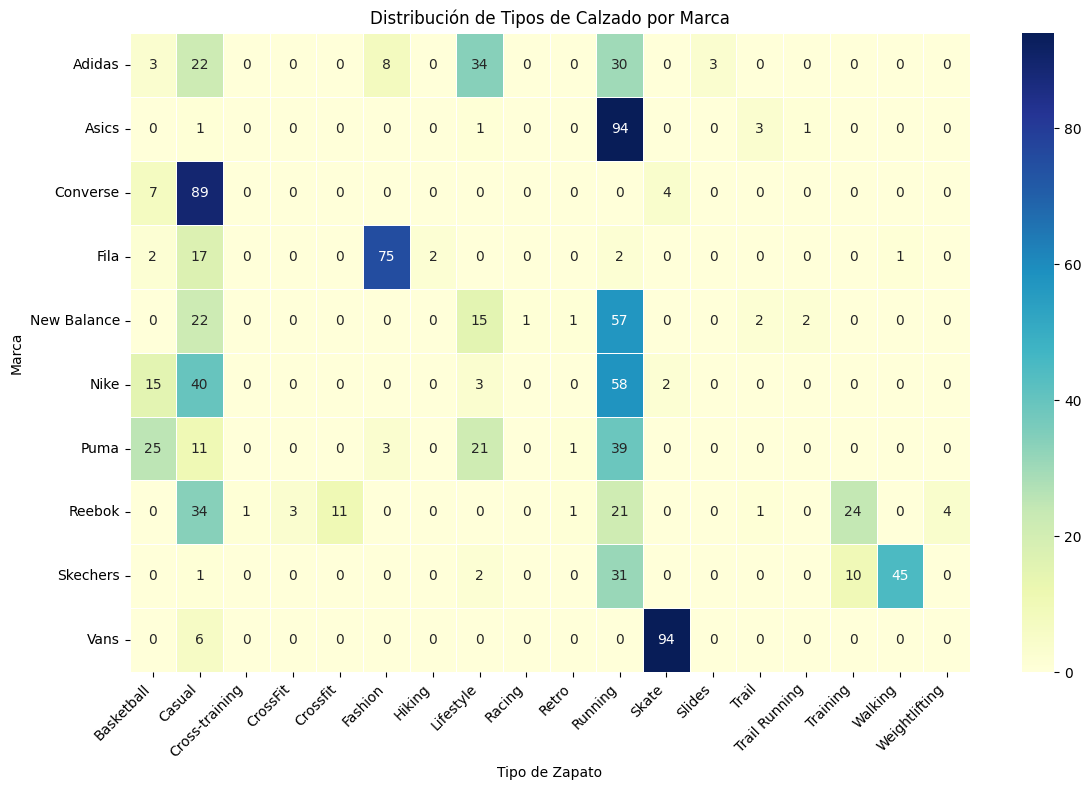

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la cantidad de cada tipo de zapato por marca
brand_type_counts = df.groupby(['Brand', 'Type']).size().unstack(fill_value=0)

# Crear el mapa de calor
plt.figure(figsize=(12, 8)) # Ajusta el tamaño según necesites
sns.heatmap(brand_type_counts, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)

plt.title('Distribución de Tipos de Calzado por Marca')
plt.xlabel('Tipo de Zapato')
plt.ylabel('Marca')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

El análisis de modelos únicos por marca muestra que la mayoría de las empresas se concentran en la categoría Alta (71,97%), apostando por un portafolio amplio y diversificado. En cambio, marcas como Fila, Adidas y Converse, dentro de la categoría Media (25,10%), optan por una estrategia más acotada, enfocada en ciertos segmentos del mercado. Finalmente, Vans representa la categoría Baja (2,93%), con un portafolio reducido y claramente dirigido a un nicho específico. Esto evidencia que, mientras algunas marcas buscan abarcar múltiples categorías, otras prefieren consolidarse en un nicho bien definido. Este hallazgo sobre las distintas estrategias de portafolio por marca es relevante para nuestra hipótesis, ya que valida que las marcas adoptan enfoques diferenciados en cuanto a la diversidad de su oferta.

📊 Tabla de Contingencia: Brand vs Gender


Gender,Men,Women
Brand,,
Adidas,29,71
Asics,41,59
Converse,39,61
Fila,59,40
New Balance,58,42
Nike,88,30
Puma,69,31
Reebok,75,25
Skechers,36,53


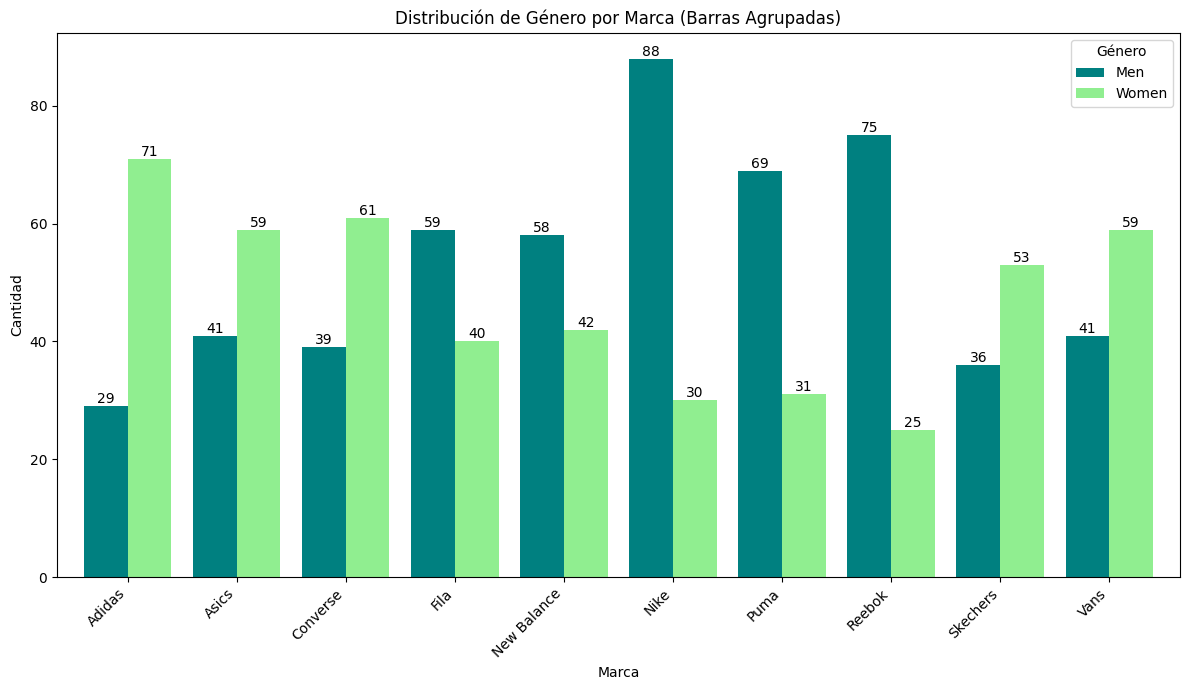

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
import numpy as np

# Asegurar que el DataFrame df esté cargado
try:
    if 'df' not in locals() and 'df' not in globals():
        # Descargar la última versión (si no se ha hecho ya)
        path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")
        # Construir la ruta completa al archivo CSV
        file_path = os.path.join(path, "Shoe prices.csv")
        df = pd.read_csv(file_path)
except Exception as e:
    print(f"Error al cargar el DataFrame: {e}")
    # Considerar agregar un exit() o return si la carga es crítica
    # Para este caso, asumiremos que si falla la carga, el siguiente código fallará de todos modos

# Limpiar la columna 'Price (USD)' y convertirla a numérica (necesario si vamos a usar precio en algún análisis posterior o si la limpieza no se hizo globalmente)
# Aunque este código no usa precio, es buena práctica si se usa el mismo df
# df['Price (USD)'] = df['Price (USD)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex= embalar.Errors='coerce')


# --- Tabla de Contingencia y Gráfico: Brand vs Gender ---

# Crear la tabla de contingencia
brand_gender_crosstab = pd.crosstab(df['Brand'], df['Gender'])

print("📊 Tabla de Contingencia: Brand vs Gender")
display(brand_gender_crosstab)

# # Crear el gráfico de barras apiladas - ELIMINADO
# brand_gender_crosstab.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')

# plt.title('Distribución de Género por Marca')
# plt.xlabel('Marca')
# plt.ylabel('Cantidad')
# plt.xticks(rotation=45, ha='right')
# plt.legend(title='Género')
# plt.tight_layout()
# plt.show()

# Gráfico de barras agrupadas para comparar mejor las cantidades por género dentro de cada marca
fig, ax = plt.subplots(figsize=(12, 7)) # Crear figura y ejes explícitamente
# Usar colores personalizados para 'Men' y 'Women'
colors = {'Men': 'teal', 'Women': 'lightgreen'} # Cambiado a verde suave para Women

brand_gender_crosstab.plot(kind='bar', stacked=False, ax=ax, width=0.8, color=[colors[col] for col in brand_gender_crosstab.columns]) # Usar colores personalizados

plt.title('Distribución de Género por Marca (Barras Agrupadas)')
plt.xlabel('Marca')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Género')

# Agregar: Cuadrícula al gráfico - ELIMINADO
# y_max = brand_gender_crosstab.values.max()
# plt.yticks(np.arange(0, y_max + 10, 10))
# plt.grid(axis='y', linestyle='-', alpha=0.5, which='major')

# Agregar: Etiquetas de datos a las barras
for c in ax.containers:
    # set the bar label
    ax.bar_label(c, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()

La Distribución de Género por Marca revela que, si bien algunas marcas como New Balance muestran una oferta relativamente balanceada entre calzado para hombres y mujeres, otras como Nike tienen una clara predominancia de productos orientados a hombres, mientras que Adidas se inclinan más hacia el público femenino. Este patrón sugiere diferentes enfoques de segmentación de mercado por parte de las marcas.

📊 Tabla de Contingencia: Type vs Gender


Gender,Men,Women
Type,,
Basketball,39,13
Casual,135,108
Cross-training,1,0
CrossFit,3,0
Crossfit,9,2
Fashion,47,39
Hiking,0,2
Lifestyle,29,47
Racing,1,0


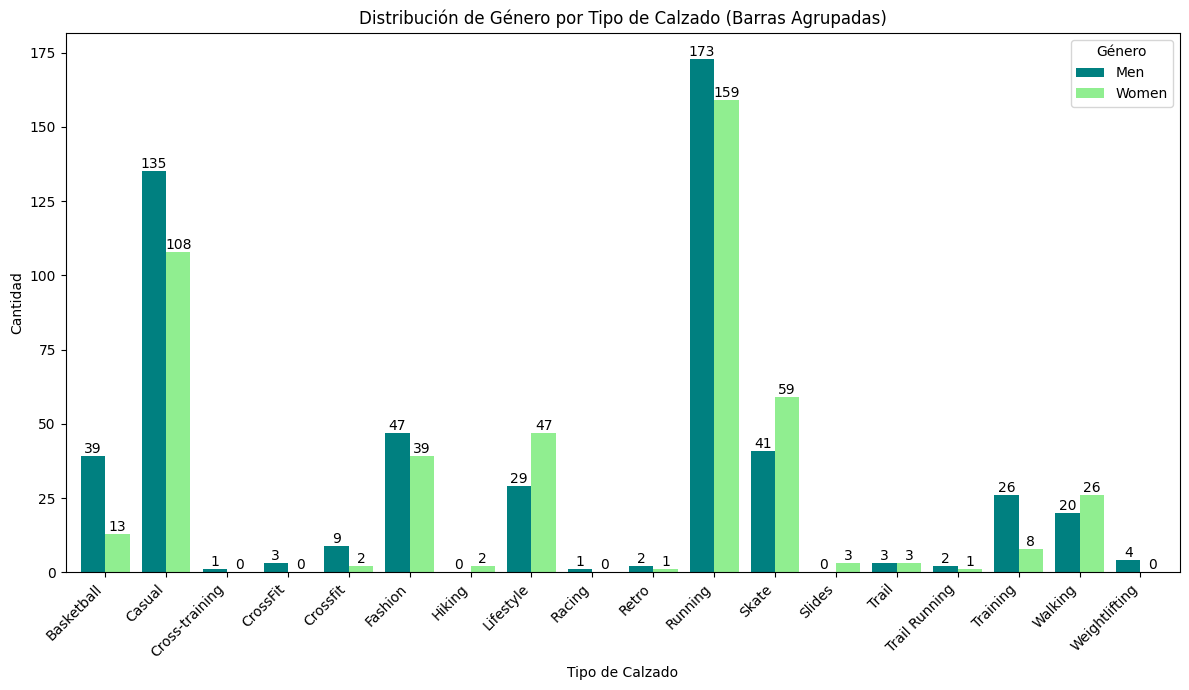

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

# Asegurar que el DataFrame df esté cargado
try:
    if 'df' not in locals() and 'df' not in globals():
        # Descargar la última versión (si no se ha hecho ya)
        path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")
        # Construir la ruta completa al archivo CSV
        file_path = os.path.join(path, "Shoe prices.csv")
        df = pd.read_csv(file_path)
except Exception as e:
    print(f"Error al cargar el DataFrame: {e}")
    # Considerar agregar un exit() o return si la carga es crítica

# Limpiar la columna 'Price (USD)' y convertirla a numérica (necesario si vamos a usar precio en algún análisis posterior o si la limpieza no se hizo globalmente)
# Aunque este código no usa precio, es buena práctica si se usa el mismo df
# df['Price (USD)'] = df['Price (USD)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
# df['Price (USD)'] = pd.to_numeric(df['Price (USD)'], errors='coerce')


# --- Tabla de Contingencia y Gráfico: Type vs Gender ---

# Crear la tabla de contingencia
type_gender_crosstab = pd.crosstab(df['Type'], df['Gender'])

print("📊 Tabla de Contingencia: Type vs Gender")
display(type_gender_crosstab)

# # Crear el gráfico de barras apiladas - ELIMINADO
# type_gender_crosstab.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='YlGnBu') # CAMBIAR colormap a 'YlGnBu'

# plt.title('Distribución de Género por Tipo de Calzado')
# plt.xlabel('Tipo de Calzado')
# plt.ylabel('Cantidad')
# plt.xticks(rotation=45, ha='right')
# plt.legend(title='Género')
# plt.tight_layout()
# plt.show()

# Opcional: Gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 7)) # Crear figura y ejes explícitamente
# Usar los mismos colores personalizados que en el gráfico de Marca vs Género
colors = {'Men': 'teal', 'Women': 'lightgreen'}

type_gender_crosstab.plot(kind='bar', stacked=False, ax=ax, width=0.8, color=[colors[col] for col in type_gender_crosstab.columns]) # CAMBIAR colormap a 'YlGnBu', usar colores personalizados

plt.title('Distribución de Género por Tipo de Calzado (Barras Agrupadas)')
plt.xlabel('Tipo de Calzado')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Género')

# --- Agregar: Etiquetas de datos a las barras ---
for c in ax.containers:
    # set the bar label
    ax.bar_label(c, fmt='%d', label_type='edge')
# --- Fin de la adición ---

plt.tight_layout()
plt.show()

De manera similar, la **Distribución de Género por Tipo de Calzado** evidencia que ciertos tipos, como Basketball y Training, están mayormente dirigidos a hombres, mientras que otros, como Lifestyle, Walking y Slides, tienen una mayor representación en la oferta para mujeres. Tipos como Casual y Running muestran una distribución de género más pareja. Estos hallazgos son cruciales para entender las preferencias de género dentro de nichos de mercado específicos y guiar estrategias de desarrollo de producto y marketing. Esta segmentación por género dentro de los tipos de calzado valida aspectos de nuestra hipótesis sobre la segmentación del mercado por tipo y género, y es relevante para la identificación de potenciales nichos desatendidos.

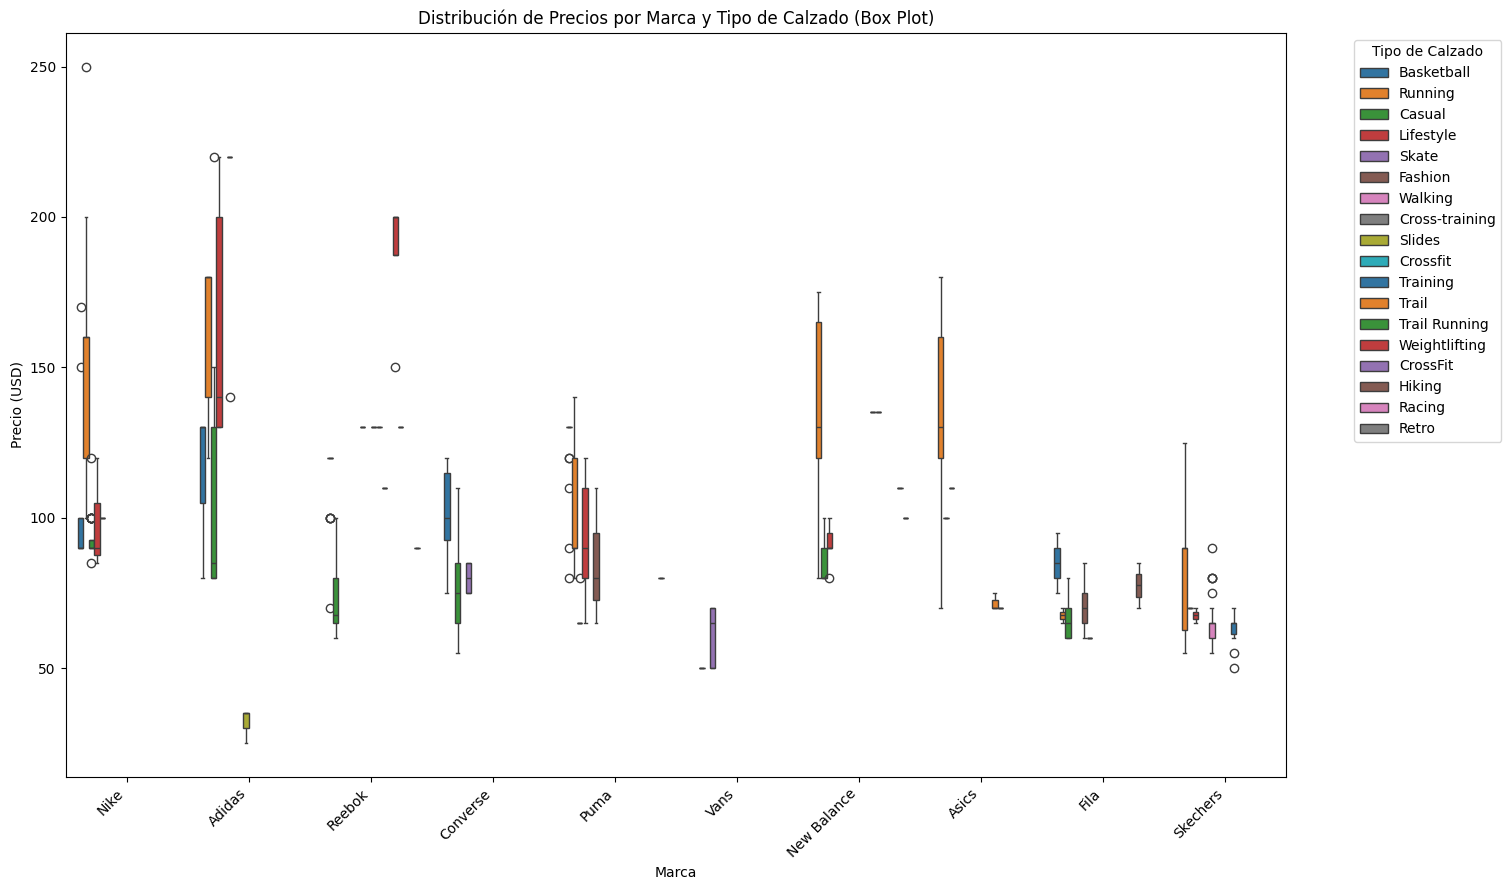

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import kagglehub
import os

# Asegurar que el DataFrame df esté cargado
try:
    if 'df' not in locals() and 'df' not in globals():
        # Descargar la última versión (si no se ha hecho ya)
        path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")
        # Construir la ruta completa al archivo CSV
        file_path = os.path.join(path, "Shoe prices.csv")
        df = pd.read_csv(file_path) # Corregido: usar file_path
except Exception as e:
    print(f"Error al cargar el DataFrame: {e}")
    # Si la carga falla, es mejor detenerse aquí.
    exit()


# Limpiar la columna 'Price (USD)' y convertirla a numérica
# Eliminar el símbolo '$' y las comas, luego convertir a float
df['Price (USD)'] = df['Price (USD)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Price (USD)'] = pd.to_numeric(df['Price (USD)'], errors='coerce') # Usar errors='coerce' para convertir errores a NaN

# Eliminar filas con valores NaN en 'Price (USD)' si hubo errores en la conversión
df_cleaned_price = df.dropna(subset=['Price (USD)']).copy()

# --- Box Plot: Precio por Marca, diferenciado por Tipo ---
plt.figure(figsize=(18, 9)) # Ajusta el tamaño para mejor visualización

# seaborn.boxplot con hue='Type', usando paleta cualitativa
sns.boxplot(data=df_cleaned_price, x='Brand', y='Price (USD)', hue='Type', palette='tab10') # CAMBIAR paleta a 'tab10' u otra cualitativa

plt.title('Distribución de Precios por Marca y Tipo de Calzado (Box Plot)')
plt.xlabel('Marca')
plt.ylabel('Precio (USD)')
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje x si son largas
plt.legend(title='Tipo de Calzado', bbox_to_anchor=(1.05, 1), loc='upper left') # Mueve la leyenda fuera del gráfico
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajusta el diseño para dar espacio a la leyenda
plt.show()

Para obtener una comprensión más profunda de las interacciones en el mercado de calzado, se realizaron análisis multivariados explorando las relaciones entre Marca, Tipo, Género y Precio.

El **Box Plot de Distribución de Precios por Marca y Tipo de Calzado** complementa nuestro análisis al visualizar cómo el precio varía en función de la marca y el tipo de zapato. Se observa que Marcas como Nike y Adidas presentan rangos de precios significativamente más altos para tipos deportivos como Running o Basketball en comparación con otras marcas o tipos casuales. Asimismo, dentro de una misma marca, la distribución de precios difiere notablemente entre tipos; por ejemplo, los modelos de Running tienden a tener una mediana de precio mayor que los modelos Casual para la mayoría de las marcas con oferta en ambos tipos. La presencia de valores atípicos en ciertas combinaciones de marca y tipo sugiere la existencia de productos de gama muy alta o variaciones significativas en el precio dentro de nichos específicos.

Este análisis visual del precio por segmentación de producto es fundamental para entender la estructura de valor en el mercado.

Estos análisis multivariados en conjunto confirman la complejidad del mercado, donde las estrategias de marca, la segmentación por tipo y género, y el posicionamiento de precios interactúan para definir la oferta de productos y apuntar a segmentos de mercado específicos.

Estos hallazgos en el Box Plot de precios son cruciales para validar nuestra hipótesis principal sobre la polarización en la estructura de precios del mercado y cómo el valor percibido está fuertemente ligado al uso específico y al posicionamiento de la marca.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Tabla de Contingencia: Brand vs Type ---

# Crear la tabla de contingencia
# Ya visualizamos esto con el heatmap, esta tabla da los números exactos
brand_type_crosstab = pd.crosstab(df['Brand'], df['Type'])

print("📊 Tabla de Contingencia: Brand vs Type")
display(brand_type_crosstab)

# Nota: Graficar esto con barras (apiladas o agrupadas) puede ser muy denso
# debido a la cantidad de tipos. El heatmap (celda 720e0725) es generalmente
# una mejor visualización para esta combinación.
# Si aún deseas el gráfico de barras, puedes descomentar el siguiente código:

# brand_type_crosstab.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')
# plt.title('Distribución de Tipos de Calzado por Marca')
# plt.xlabel('Marca')
# plt.ylabel('Cantidad')
# plt.xticks(rotation=45, ha='right')
# plt.legend(title='Tipo de Calzado', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout(rect=[0, 0, 0.85, 1])
# plt.show()

📊 Tabla de Contingencia: Brand vs Type


Type,Basketball,Casual,Cross-training,CrossFit,Crossfit,Fashion,Hiking,Lifestyle,Racing,Retro,Running,Skate,Slides,Trail,Trail Running,Training,Walking,Weightlifting
Brand,,,,,,,,,,,,,,,,,,
Adidas,3,22,0,0,0,8,0,34,0,0,30,0,3,0,0,0,0,0
Asics,0,1,0,0,0,0,0,1,0,0,94,0,0,3,1,0,0,0
Converse,7,89,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0
Fila,2,17,0,0,0,75,2,0,0,0,2,0,0,0,0,0,1,0
New Balance,0,22,0,0,0,0,0,15,1,1,57,0,0,2,2,0,0,0
Nike,15,40,0,0,0,0,0,3,0,0,58,2,0,0,0,0,0,0
Puma,25,11,0,0,0,3,0,21,0,1,39,0,0,0,0,0,0,0
Reebok,0,34,1,3,11,0,0,0,0,1,21,0,0,1,0,24,0,4
Skechers,0,1,0,0,0,0,0,2,0,0,31,0,0,0,0,10,45,0


La tabla de contingencia de Marca vs. Tipo  nos indica qué marcas ofrecen qué tipos de calzado y en qué cantidades. Vemos que algunas marcas se especializan ej: Converse en Casual, Vans en Skate, Asics en Running/Trail, mientras que otras tienen una oferta más diversificada ej: Nike, Adidas, Puma, New Balance, Reebok.

Este análisis es relevante para nuestra hipótesis sobre las diferentes estrategias de marca en cuanto a la diversidad de su oferta y la potencial identificación de nichos basados en la especialización por tipo de calzado.

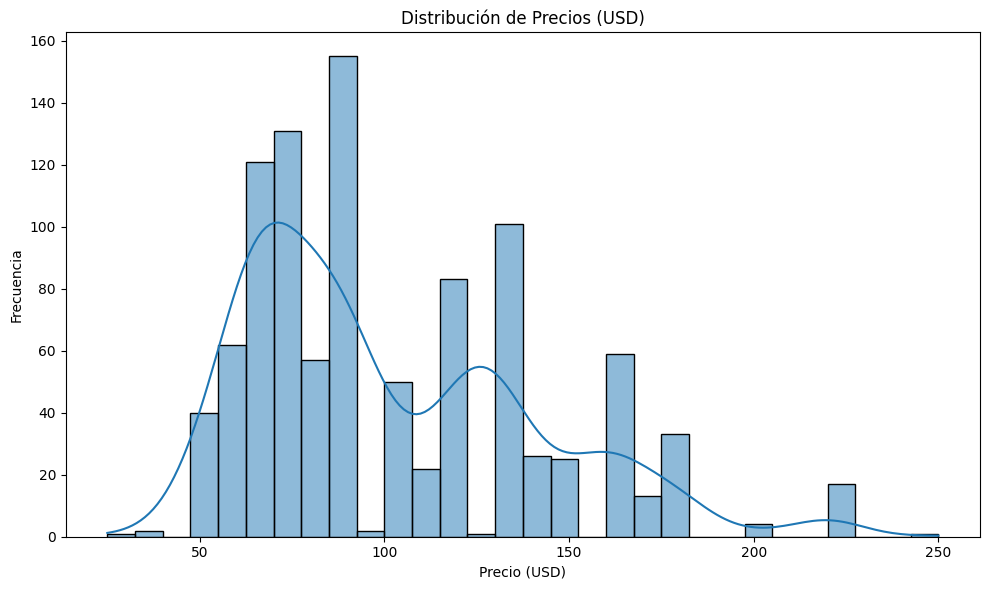

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Limpiar la columna 'Price (USD)' y convertirla a numérica
# Eliminar el símbolo '$' y las comas, luego convertir a float
df['Price (USD)'] = df['Price (USD)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Price (USD)'] = pd.to_numeric(df['Price (USD)'], errors='coerce') # Usar errors='coerce' para convertir errores a NaN

# Eliminar filas con valores NaN en 'Price (USD)' si hubo errores en la conversión
df_cleaned_price = df.dropna(subset=['Price (USD)']).copy()


# Crear el histograma de precios
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned_price, x='Price (USD)', bins=30, kde=True) # bins ajusta el número de barras, kde agrega una línea de densidad

plt.title('Distribución de Precios (USD)')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

El histograma de distribución de precios muestra que la mayor parte de los productos se concentran en el rango de 50 a 120 USD, con picos marcados entre 70 y 100 USD, lo que refleja que el mercado se orienta principalmente a una oferta de gama media-baja. La forma de la distribución evidencia un sesgo hacia la derecha, ya que existen menos productos en rangos de precios más altos (150 a 250 USD). Sin embargo, la presencia de modelos en este extremo superior sugiere que algunas marcas ofrecen productos premium o ediciones especiales que buscan captar un segmento exclusivo, aunque en volúmenes menores.

Using Colab cache for faster access to the 'shoe-prices-dataset' dataset.
📊 Precio Promedio por Tipo de Calzado:


,Type,Precio Promedio (USD) fmt
17,Weightlifting,$187.50
2,Cross-training,$130.00
4,Crossfit,$130.00
3,CrossFit,$130.00
10,Running,$129.08
7,Lifestyle,$122.83
14,Trail Running,$113.33
0,Basketball,$112.69
15,Training,$110.29
8,Racing,$110.00


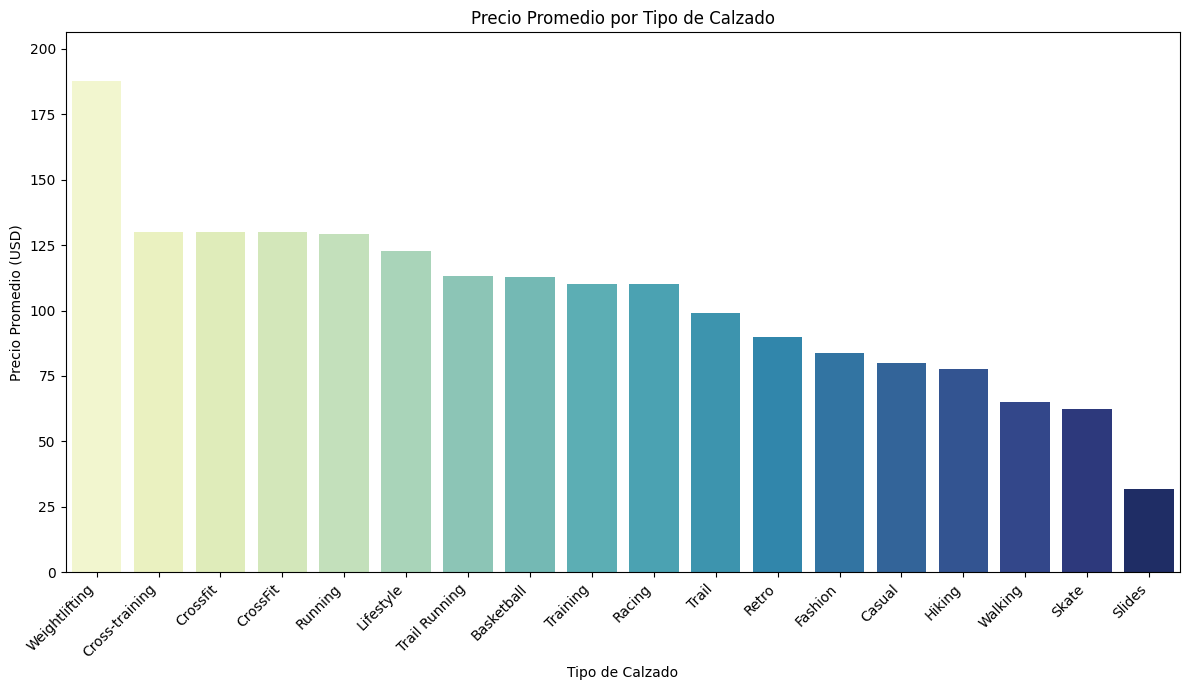

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import kagglehub
import os

# Asegurar que el DataFrame df esté cargado
try:
    if 'df' not in locals() and 'df' in globals(): # Corregido: 'df' in globals() para chequear si ya existe globalmente
        pass # df ya está cargado
    else:
        # Descargar la última versión (si no se ha hecho ya)
        path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")
        # Construir la ruta completa al archivo CSV
        file_path = os.path.join(path, "Shoe prices.csv")
        df = pd.read_csv(file_path)
except Exception as e:
    print(f"Error al cargar el DataFrame: {e}")
    # Si la carga falla, es mejor detenerse aquí.
    exit()


# Limpiar la columna 'Price (USD)' y convertirla a numérica
df['Price (USD)'] = df['Price (USD)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Price (USD)'] = pd.to_numeric(df['Price (USD)'], errors='coerce') # Usar errors='coerce' para convertir errores a NaN

# Eliminar filas con valores NaN en 'Price (USD)' si hubo errores en la conversión
df_cleaned_price = df.dropna(subset=['Price (USD)']).copy()

# --- Calcular el precio promedio por Tipo de Calzado ---
# Corregido: quitar el corchete ']' del nombre de la columna
average_price_by_type = df_cleaned_price.groupby('Type')['Price (USD)'].mean().reset_index()
average_price_by_type.columns = ['Type', 'Precio Promedio (USD)']

# Ordenar por precio promedio descendente para mejor visualización
average_price_by_type = average_price_by_type.sort_values(by='Precio Promedio (USD)', ascending=False)

# --- Formatear la columna de Precio Promedio con signo de dólar y 2 decimales ---
average_price_by_type['Precio Promedio (USD) fmt'] = average_price_by_type['Precio Promedio (USD)'].map('${:.2f}'.format)
# --- Fin de la modificación ---

print("📊 Precio Promedio por Tipo de Calzado:")
display(average_price_by_type[['Type', 'Precio Promedio (USD) fmt']]) # Mostrar la columna formateada

# --- Crear un gráfico de barras del precio promedio por Tipo ---
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=average_price_by_type,
    x='Type',
    y='Precio Promedio (USD)',
    hue='Type',                # Se agrega hue para compatibilidad futura
    palette='YlGnBu',
    legend=False               # Evita mostrar la leyenda duplicada
)

plt.title('Precio Promedio por Tipo de Calzado')
plt.xlabel('Tipo de Calzado')
plt.ylabel('Precio Promedio (USD)')
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje x

# --- Asegurar que el eje Y comience en 0 ---
plt.ylim(0, average_price_by_type['Precio Promedio (USD)'].max() * 1.1) # Establecer el límite inferior en 0 y un poco por encima del máximo
# --- Fin de la adición ---

plt.tight_layout()
plt.show()


Al observar los precios promedio por tipo de calzado, se confirma una segmentación clara en función del uso. Los tipos relacionados con alto rendimiento, como Weightlifting, Cross-training, Crossfit y Running, presentan precios promedio más elevados, posicionándose como categorías premium dentro del mercado. En contraste, los tipos de uso cotidiano o recreativo, como Casual, Fashion, Hiking, Walking y Skate, se encuentran en valores más bajos, generalmente entre 60 y 90 USD, reflejando su enfoque en la masividad y accesibilidad. Los Slides, con un precio promedio de 31.67 USD, representan la categoría más económica y dirigida al consumo básico.

El gráfico de barras de precio promedio por tipo refuerza esta tendencia, mostrando visualmente cómo los calzados especializados en alto rendimiento se ubican consistentemente en la parte superior del espectro de precios, mientras que los productos casuales y lifestyle se concentran en el rango inferior. Esto indica que las marcas adoptan una doble estrategia: por un lado, captar grandes volúmenes de consumidores mediante productos accesibles y de uso diario, y por otro, posicionar líneas de alto rendimiento con precios más altos que apuntan a nichos específicos y generan una percepción de exclusividad y valor agregado.

Este análisis del precio promedio por tipo es fundamental para validar nuestra hipótesis sobre la polarización de la estructura de precios basada en el tipo de calzado y el valor percibido asociado a su uso específico.

----

Entrega final

---

### Análisis de Atributos y Reducción de Dimensionalidad

En esta segunda etapa, procederemos a analizar los diferentes atributos del DataFrame para identificar aquellos de mayor relevancia para nuestro análisis. Bajo esta premisa, eliminaremos tres atributos que consideramos de bajo nivel de relevancia según la hipótesis que estamos manejando.

### Análisis de Atributos y Reducción de Dimensionalidad

En esta etapa, realizamos un análisis y preparación inicial de los atributos del dataset con el objetivo de identificar y seleccionar aquellas variables más relevantes para nuestro análisis predictivo, simplificando el conjunto de datos para las siguientes fases del proyecto.

#### Eliminación Inicial de Atributos

Procedimos a eliminar tres atributos específicos del DataFrame que, según la hipótesis de análisis y la relevancia percibida para la predicción de precios en este contexto, consideramos de bajo nivel de relevancia. Las columnas eliminadas fueron 'Gender', 'Size' y 'Material'.

El siguiente código muestra la carga inicial del DataFrame, la limpieza de la columna de precio y la eliminación de estas tres columnas:

In [57]:
print("Columns")
df.columns

Columns


Index(['Brand', 'Model', 'Type', 'Gender', 'Size', 'Color', 'Material',
       'Price (USD)'],
      dtype='object')

In [58]:
import pandas as pd
# No necesitamos importar kagglehub, os, numpy aquí si ya tenemos el DataFrame cargado y limpio
# import kagglehub
# import os
# import numpy as np

# --- Asegurar que el DataFrame limpio esté disponible ---
# Asumimos que df_cleaned_price (o un DataFrame similar con el precio limpio)
# ya existe de ejecuciones anteriores.

df_to_process = pd.DataFrame() # Inicializar df_to_process
if 'df_cleaned_price' not in locals() and 'df_cleaned_price' not in globals():
    print("DataFrame 'df_cleaned_price' no encontrado. Asegúrese de que la celda de carga y limpieza inicial se haya ejecutado correctamente.")
    # En un flujo de trabajo real, podrías añadir aquí la lógica para cargar y limpiar si no existe
    # Para este ejemplo, si no está disponible, df_to_process se quedará vacío.
else:
    # Si df_cleaned_price existe, lo asignamos a df_to_process
    if 'df_cleaned_price' in locals():
        df_to_process = df_cleaned_price.copy() # Trabajar sobre una copia para no modificar el original
    elif 'df_cleaned_price' in globals():
        df_to_process = df_cleaned_price.copy() # Trabajar sobre una copia para no modificar el original


# --- Eliminar las columnas especificadas (Gender, Size, Material) ---
if not df_to_process.empty:
    # Definir la lista de columnas a eliminar, similar a tu ejemplo
    columns_to_drop_manual = ['Gender', 'Size']

    print(f"\nColumnas originales en el DataFrame (asumiendo df_cleaned_price): {df_to_process.shape[1]}")

    # Eliminar las columnas del DataFrame
    # Usamos errors='ignore' para no generar un error si alguna columna ya no existe
    df_reduced_manual = df_to_process.drop(columns=columns_to_drop_manual, errors='ignore')

    print(f"Columnas después de eliminar {columns_to_drop_manual}: {df_reduced_manual.shape[1]}")

    print("\nPrimeras 5 filas del DataFrame con columnas eliminadas ('df_reduced_manual'):")
    display(df_reduced_manual.head())

    print("\nNombres de las columnas restantes:")
    print(list(df_reduced_manual.columns))

else:
    print("\nNo se realizó la eliminación de columnas porque el DataFrame inicial no estaba disponible o estaba vacío.")
    df_reduced_manual = pd.DataFrame() # Asegurar que df_reduced_manual esté vacío


# Ahora puedes usar 'df_reduced_manual' para continuar con el pre-procesamiento y modelado
# Este DataFrame tiene las columnas 'Gender', 'Size' y 'Material' eliminadas.


Columnas originales en el DataFrame (asumiendo df_cleaned_price): 8
Columnas después de eliminar ['Gender', 'Size']: 6

Primeras 5 filas del DataFrame con columnas eliminadas ('df_reduced_manual'):


,Brand,Model,Type,Color,Material,Price (USD)
0,Nike,Air Jordan 1,Basketball,Red/Black,Leather,170.0
1,Adidas,Ultra Boost 21,Running,Black,Primeknit,180.0
2,Reebok,Classic Leather,Casual,White,Leather,75.0
3,Converse,Chuck Taylor,Casual,Navy,Canvas,55.0
4,Puma,Future Rider,Lifestyle,Pink,Mesh,80.0



Nombres de las columnas restantes:
['Brand', 'Model', 'Type', 'Color', 'Material', 'Price (USD)']


# Limpieza de Nombres de Columnas
Para asegurar la consistencia y facilitar el manejo programático de las columnas en las etapas posteriores, aplicamos un proceso de limpieza a los nombres de los atributos restantes en el DataFrame.

El siguiente código estandariza los nombres de las columnas convirtiéndolos a minúsculas, eliminando espacios al inicio y final, reemplazando espacios internos por guiones bajos y removiendo paréntesis:

In [59]:
import pandas as pd

# Asegurar que df_reduced_manual esté disponible
if 'df_reduced_manual' not in locals() and 'df_reduced_manual' not in globals():
    print("DataFrame 'df_reduced_manual' no encontrado. Asegúrese de que la celda de eliminación de columnas se haya ejecutado correctamente.")
    # Si no está disponible, no podemos aplicar la limpieza de nombres.
    # Considera agregar un exit() o return aquí en un flujo de trabajo real.
else:
    # --- Aplicar la limpieza a los nombres de las columnas ---
    # Creamos una copia para no modificar el DataFrame original si no es necesario, aunque aquí sobreescribimos las columnas
    df_cleaned_cols = df_reduced_manual.copy()

    df_cleaned_cols.columns = df_cleaned_cols.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")

    print("Nombres de columnas antes de la limpieza:")
    print(list(df_reduced_manual.columns))

    print("\nNombres de columnas después de la limpieza:")
    print(list(df_cleaned_cols.columns))

    # Puedes mostrar las primeras filas para ver el resultado con los nuevos nombres
    print("\nPrimeras 5 filas del DataFrame con nombres de columnas limpiados:")
    display(df_cleaned_cols.head())

    # Ahora puedes usar 'df_cleaned_cols' para los siguientes pasos

Nombres de columnas antes de la limpieza:
['Brand', 'Model', 'Type', 'Color', 'Material', 'Price (USD)']

Nombres de columnas después de la limpieza:
['brand', 'model', 'type', 'color', 'material', 'price_usd']

Primeras 5 filas del DataFrame con nombres de columnas limpiados:


,brand,model,type,color,material,price_usd
0,Nike,Air Jordan 1,Basketball,Red/Black,Leather,170.0
1,Adidas,Ultra Boost 21,Running,Black,Primeknit,180.0
2,Reebok,Classic Leather,Casual,White,Leather,75.0
3,Converse,Chuck Taylor,Casual,Navy,Canvas,55.0
4,Puma,Future Rider,Lifestyle,Pink,Mesh,80.0


### Análisis de Valores Faltantes (Usando la Función Definida)

Ahora, llamaremos a la función `analyze_missing_values` que definimos en la celda anterior para examinar los valores nulos en nuestro DataFrame `df_cleaned_cols` (el DataFrame con nombres de columnas limpiados y columnas eliminadas).

In [60]:
def analyze_missing_values(df):

    # Calcular valores nulos
    missing_values = df.isna().sum()
    missing_percentage = ((df.isna().sum() / len(df)) * 100).round(2)

    # Crear DataFrame
    missing_df = pd.DataFrame({
        "Cantidad_Nulos": missing_values,
        "Porcentaje_Nulos": missing_percentage
    })

    # Ordenar por porcentaje de nulos
    missing_df = missing_df.sort_values(by="Porcentaje_Nulos", ascending=False)
    return missing_df

In [61]:
missing_df = analyze_missing_values(df)
missing_df

,Cantidad_Nulos,Porcentaje_Nulos
Brand,0,0.0
Model,0,0.0
Type,0,0.0
Gender,0,0.0
Size,0,0.0
Color,0,0.0
Material,0,0.0
Price (USD),0,0.0


In [62]:
def remove_duplicates_with_info(df):
    """
    Removes duplicate rows from a DataFrame and prints information about the process.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: The DataFrame with duplicate rows removed.
    """
    original_rows = df.shape[0]
    df_cleaned = df.drop_duplicates().copy() # Usar .copy() para evitar SettingWithCopyWarning
    rows_removed = original_rows - df_cleaned.shape[0]

    print(f"Original number of rows: {original_rows}")
    print(f"Number of rows after removing duplicates: {df_cleaned.shape[0]}")
    print(f"Number of duplicate rows removed: {rows_removed}")

    return df_cleaned

In [63]:
df = remove_duplicates_with_info(df)

Original number of rows: 1006
Number of rows after removing duplicates: 925
Number of duplicate rows removed: 81


In [64]:
import pandas as pd
import numpy as np # Importar numpy para isnull().sum()

# --- Definir la función quick_unique_count ---
def quick_unique_count(df, columns=None):

    if columns is None:
        columns = df.columns

    print("📊 CONTEO Y ANÁLISIS RÁPIDO DE VALORES ÚNICOS POR COLUMNA")

    for col in columns:
        if col in df.columns:
            print("-" * 40) # Separador para cada columna
            print(f"🔬 Columna: {col}")

            unique_count = df[col].nunique()
            total_count = len(df[col])
            # Usar .isnull().sum() con numpy o pandas si es serie
            null_count = df[col].isnull().sum() if isinstance(df[col], pd.Series) else np.sum(pd.isnull(df[col])) # Asegurar que funcione si no es Series

            # Manejar caso de columna vacía o sin moda
            moda_value = df[col].mode()
            moda_str = ', '.join(map(str, moda_value.tolist())) if not moda_value.empty else "N/A" # Convertir moda a string legible


            print(f"   • Tipo de dato: {df[col].dtype}")
            print(f"   • Valores únicos: {unique_count:,}")
            print(f"   • Valor de la moda: {moda_str}")
            print(f"   • Total de valores: {total_count:,}")
            print(f"   • Valores nulos: {null_count:,}")

            # Evitar división por cero si total_count es 0
            if total_count > 0:
                 print(f"   • % Únicos: {(unique_count/total_count*100):.1f}%")
            else:
                 print("   • % Únicos: N/A (DataFrame vacío)")


            # Mostrar algunos valores únicos (especial manejo para floats)
            if unique_count == 0:
                 print("   • Valores: Columna vacía")
            elif unique_count <= 10:
                # Convertir a lista y manejar nulos si dropna=True
                unique_vals = df[col].dropna().unique()
                # Ordenar solo si los tipos de datos son comparables
                try:
                    sorted_unique_vals = sorted(unique_vals, key=str) # Ordenar como string para evitar errores de tipo
                    print(f"   • Valores: {sorted_unique_vals}")
                except TypeError:
                     print(f"   • Valores: {list(unique_vals)} (No se pudo ordenar)")

            elif df[col].dtype in ['float64', 'float32', 'int64', 'int32']: # Incluir ints para rango
                # Para tipos numéricos, mostrar rango
                min_val = df[col].min() if null_count < total_count else np.nan # Manejar caso solo nulos
                max_val = df[col].max() if null_count < total_count else np.nan # Manejar caso solo nulos
                if not pd.isna(min_val) and not pd.isna(max_val):
                     print(f"   • Rango: [{min_val:.2f} - {max_val:.2f}]")
                elif total_count > 0 and null_count == total_count:
                     print("   • Rango: Todos los valores son nulos")
                else:
                     print("   • Rango: N/A (Problema al calcular rango)")

            else:
                # Mostrar ejemplos para otras columnas con muchos valores únicos
                sample_vals = df[col].dropna().unique()[:5] # Mostrar 5 ejemplos
                print(f"   • Ejemplos: {list(sample_vals)}")


        else:
            print(f"⚠️ Columna '{col}' no encontrada en el DataFrame.")

    print("-" * 40) # Separador final


# --- Llamar a la función quick_unique_count ---

# Asegurar que un DataFrame esté disponible para el análisis
df_to_analyze = None

if 'df_deduplicated' in locals() or 'df_deduplicated' in globals():
    df_to_analyze = df_deduplicated
    print("Usando 'df_deduplicated' para el conteo de valores únicos.")
elif 'df_cleaned_cols' in locals() or 'df_cleaned_cols' in globals():
    df_to_analyze = df_cleaned_cols
    print("Usando 'df_cleaned_cols' para el conteo de valores únicos.")
elif 'df_reduced_manual' in locals() or 'df_reduced_manual' in globals():
    df_to_analyze = df_reduced_manual
    print("Usando 'df_reduced_manual' para el conteo de valores únicos.")
elif 'df' in locals() or 'df' in globals():
    # Si los DataFrames procesados no están, usar el df original (con precio limpio si es posible)
    if df['Price (USD)'].dtype == 'object': # Verificar si precio necesita limpieza
         df['Price (USD)'] = df['Price (USD)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
         df['Price (USD)'] = pd.to_numeric(df['Price (USD)'], errors='coerce')
    df_to_analyze = df.dropna(subset=['Price (USD)']).copy()
    print("Usando 'df' (con precio limpio) para el conteo de valores únicos.")
else:
    print("No se encontraron DataFrames adecuados para el análisis de valores únicos.")


if df_to_analyze is not None and not df_to_analyze.empty:
    # Llamar a la función para todas las columnas del DataFrame disponible
    quick_unique_count(df_to_analyze)

    # Si quieres analizar solo columnas específicas, puedes pasar una lista:
    # quick_unique_count(df_to_analyze, columns=['brand', 'type', 'price_usd']) # Ejemplo

else:
    print("\nNo se realizó el análisis de valores únicos porque el DataFrame no está disponible o está vacío.")

Usando 'df_cleaned_cols' para el conteo de valores únicos.
📊 CONTEO Y ANÁLISIS RÁPIDO DE VALORES ÚNICOS POR COLUMNA
----------------------------------------
🔬 Columna: brand
   • Tipo de dato: object
   • Valores únicos: 10
   • Valor de la moda: Nike
   • Total de valores: 1,006
   • Valores nulos: 0
   • % Únicos: 1.0%
   • Valores: ['Adidas', 'Asics', 'Converse', 'Fila', 'New Balance', 'Nike', 'Puma', 'Reebok', 'Skechers', 'Vans']
----------------------------------------
🔬 Columna: model
   • Tipo de dato: object
   • Valores únicos: 239
   • Valor de la moda: NMD_R1, Sk8-Hi
   • Total de valores: 1,006
   • Valores nulos: 0
   • % Únicos: 23.8%
   • Ejemplos: ['Air Jordan 1', 'Ultra Boost 21', 'Classic Leather', 'Chuck Taylor', 'Future Rider']
----------------------------------------
🔬 Columna: type
   • Tipo de dato: object
   • Valores únicos: 18
   • Valor de la moda: Running
   • Total de valores: 1,006
   • Valores nulos: 0
   • % Únicos: 1.8%
   • Ejemplos: ['Basketball', 'Ru

Usando 'df_cleaned_cols' para graficar distribuciones.

Generando gráficos de distribución por tipo de dato...
Columnas numéricas encontradas para graficar: 1
Columnas categóricas encontradas para graficar: 5


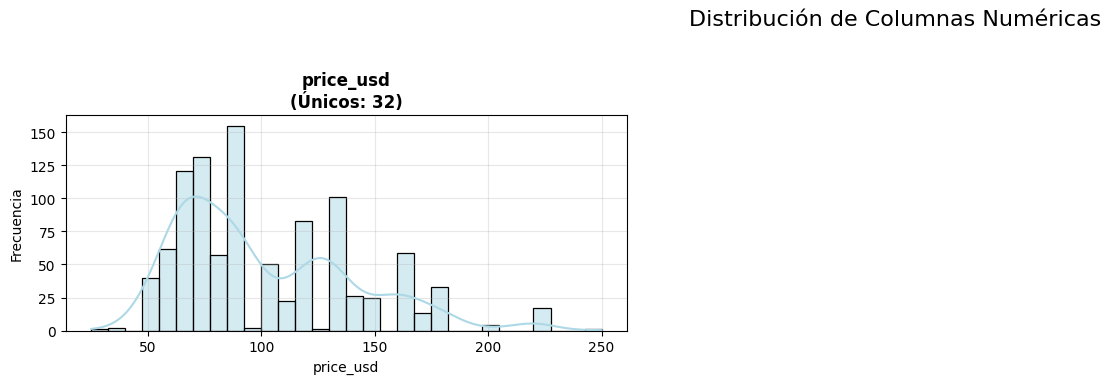

Mostrando Top 10 categorías para la columna 'model' (total únicos: 239)
Mostrando Top 10 categorías para la columna 'type' (total únicos: 18)
Mostrando Top 10 categorías para la columna 'color' (total únicos: 82)
Mostrando Top 10 categorías para la columna 'material' (total únicos: 34)


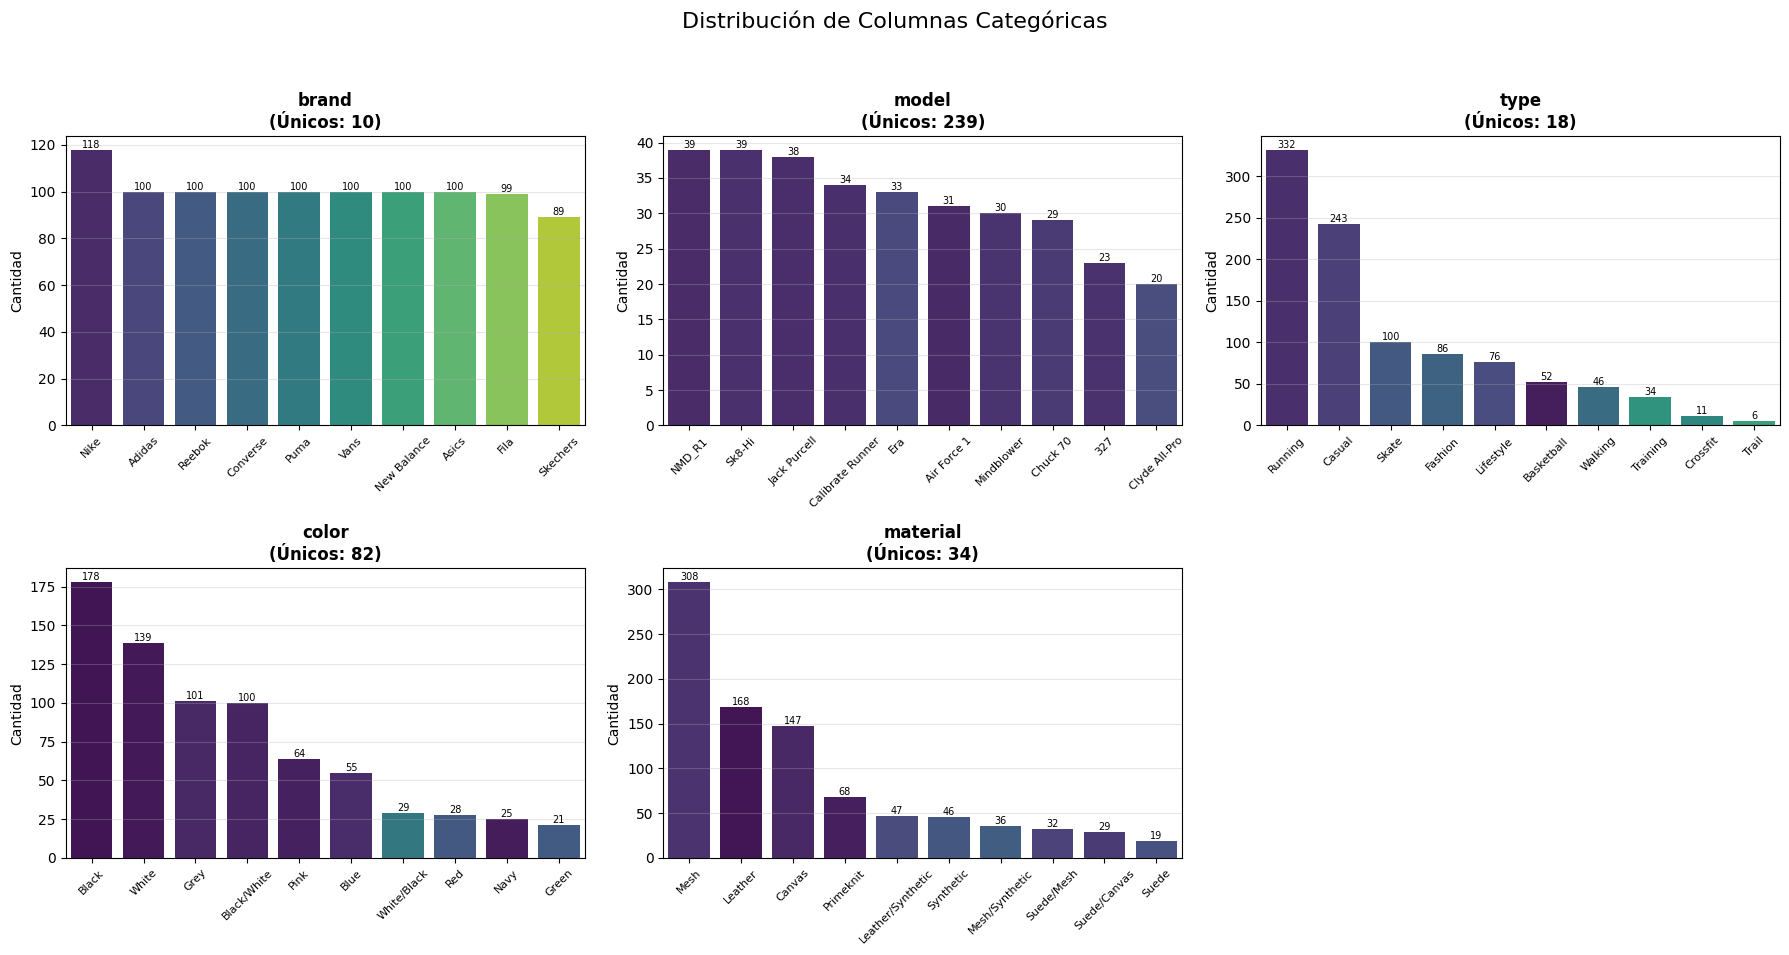

In [65]:
# Corregido: Importar numpy correctamente
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Asegurar que pandas esté importado si se usa df

# Asegurar que un DataFrame esté disponible para el análisis
# Usaremos df_deduplicated si existe, si no, df_cleaned_cols, etc.
df_to_analyze_distribution = None

if 'df_deduplicated' in locals() or 'df_deduplicated' in globals():
    df_to_analyze_distribution = df_deduplicated
    print("Usando 'df_deduplicated' para graficar distribuciones.")
elif 'df_cleaned_cols' in locals() or 'df_cleaned_cols' in globals():
    df_to_analyze_distribution = df_cleaned_cols
    print("Usando 'df_cleaned_cols' para graficar distribuciones.")
elif 'df_reduced_manual' in locals() or 'df_reduced_manual' in globals():
    df_to_analyze_distribution = df_reduced_manual
    print("Usando 'df_reduced_manual' para graficar distribuciones.")
elif 'df' in locals() or 'df' in globals():
    # Si los DataFrames procesados no están, usar el df original (con precio limpio si es posible)
    if df['Price (USD)'].dtype == 'object': # Verificar si precio necesita limpieza
         df['Price (USD)'] = df['Price (USD)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
         df['Price (USD)'] = pd.to_numeric(df['Price (USD)'], errors='coerce')
    df_to_analyze_distribution = df.dropna(subset=['Price (USD)']).copy()
    print("Usando 'df' (con precio limpio) para graficar distribuciones.")
else:
    print("No se encontraron DataFrames adecuados para graficar distribuciones.")


# Continuar solo si se encontró un DataFrame
if df_to_analyze_distribution is not None and not df_to_analyze_distribution.empty:

    def plot_by_dtype_subplots(df, columns=None):
        if columns is None:
            columns = df.columns.tolist()

        # Separar por tipo de dato
        numeric_cols = df[columns].select_dtypes(include=[np.number]).columns.tolist()
        # Incluir 'object' y 'category' para columnas categóricas
        categorical_cols = df[columns].select_dtypes(include=['object', 'category']).columns.tolist()


        print(f"Columnas numéricas encontradas para graficar: {len(numeric_cols)}")
        print(f"Columnas categóricas encontradas para graficar: {len(categorical_cols)}")

        if numeric_cols:
            n_numeric = len(numeric_cols)
            # Calcular filas necesarias (3 columnas por fila)
            n_rows_numeric = (n_numeric + 2) // 3
            # Ajustar tamaño de figura
            fig_numeric, axes_numeric = plt.subplots(n_rows_numeric, 3, figsize=(18, n_rows_numeric * 4))

            # Asegurar que axes_numeric sea un array 2D incluso si solo hay 1 fila
            if n_rows_numeric == 1:
                axes_numeric = axes_numeric.reshape(1, -1)

            fig_numeric.suptitle('Distribución de Columnas Numéricas', fontsize=16)

            for i, col in enumerate(numeric_cols):
                row = i // 3
                col_ax = i % 3
                ax = axes_numeric[row, col_ax]

                # Manejar NaNs antes de graficar si es necesario (histplot los maneja por defecto)
                sns.histplot(data=df, x=col, bins=30, kde=True, ax=ax, color='lightblue', edgecolor='black')
                ax.set_title(f'{col}\n(Únicos: {df[col].nunique()})', fontweight='bold')
                ax.set_ylabel('Frecuencia')
                ax.grid(True, alpha=0.3)

            # Ocultar ejes vacíos
            for i in range(len(numeric_cols), n_rows_numeric * 3):
                row = i // 3
                col_ax = i % 3
                axes_numeric[row, col_ax].set_visible(False)

            plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar layout para título superior
            plt.show()


        # Graficar categóricas
        if categorical_cols:
            n_categorical = len(categorical_cols)
            # Calcular filas necesarias (3 columnas por fila)
            n_rows_categorical = (n_categorical + 2) // 3
            # Ajustar tamaño de figura
            fig_categorical, axes_categorical = plt.subplots(n_rows_categorical, 3, figsize=(18, n_rows_categorical * 5)) # Aumentar altura para etiquetas giradas

            # Asegurar que axes_categorical sea un array 2D incluso si solo hay 1 fila
            if n_rows_categorical == 1:
                axes_categorical = axes_categorical.reshape(1, -1)


            fig_categorical.suptitle('Distribución de Columnas Categóricas', fontsize=16)

            for i, col in enumerate(categorical_cols):
                row = i // 3
                col_ax = i % 3
                ax = axes_categorical[row, col_ax]

                # Usar seaborn.countplot para categóricas
                # Mostrar el top 10 o un número razonable si hay muchas categorías únicas
                value_counts = df[col].value_counts().head(10) # Mostrar Top 10 categorías por defecto
                if df[col].nunique() > 10:
                     print(f"Mostrando Top 10 categorías para la columna '{col}' (total únicos: {df[col].nunique()})")


                sns.countplot(x=col, data=df, order=value_counts.index, ax=ax, palette='viridis', hue=col, legend=False) # Usar countplot, ordenar por value_counts, añadir hue/legend=False

                ax.set_title(f'{col}\n(Únicos: {df[col].nunique()})', fontweight='bold')
                ax.set_xlabel('') # Eliminar etiqueta x genérica, ya está en el título
                ax.set_ylabel('Cantidad')
                # Corregido: Eliminar 'ha='right'' ya que no es un parámetro válido para tick_params
                ax.tick_params(axis='x', rotation=45, labelsize=8)

                # Añadir etiquetas de datos a las barras
                for container in ax.containers:
                    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=7)

                ax.grid(axis='y', alpha=0.3) # Cuadrícula solo en eje y

            # Ocultar ejes vacíos
            for i in range(len(categorical_cols), n_rows_categorical * 3):
                row = i // 3
                col_ax = i % 3
                axes_categorical[row, col_ax].set_visible(False)

            plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar layout para título superior
            plt.show()

        if not numeric_cols and not categorical_cols:
             print("No se encontraron columnas numéricas o categóricas en el DataFrame para graficar.")


    # --- Llamar a la función de graficado ---
    print("\nGenerando gráficos de distribución por tipo de dato...")
    plot_by_dtype_subplots(df_to_analyze_distribution)

else:
    print("\nNo se pudo generar gráficos de distribución porque el DataFrame no está disponible o está vacío.")

In [66]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier # Comentado para evitar ModuleNotFoundError si no está instalado
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, classification_report,
                           roc_auc_score, roc_curve)
import warnings
warnings.filterwarnings('ignore')

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np # Importar numpy por si acaso
import kagglehub # Necesario para la recreación
import os # Necesario para la recreación
from sklearn.preprocessing import OneHotEncoder # Necesario para la recreación
from sklearn.compose import ColumnTransformer # Necesario para la recreación
from sklearn.pipeline import Pipeline # Necesario para la recreación


# --- Asegurar que df_encoded esté disponible y no vacío ---
# Inicializamos df_encoded a None para saber si se cargó o recreó exitosamente
df_encoded = None

if 'df_encoded' in globals() and isinstance(globals()['df_encoded'], pd.DataFrame) and not globals()['df_encoded'].empty:
     # Si df_encoded ya existe en el entorno global y no está vacío, lo usamos
     df_encoded = globals()['df_encoded']
     print("DataFrame 'df_encoded' encontrado y no vacío.")
else:
    print("DataFrame 'df_encoded' no encontrado o está vacío. Intentando recrearlo con los pasos necesarios.")
    try:
        # --- Paso 1: Cargar y limpiar df ---
        df_step1 = None
        if 'df' in globals() and isinstance(globals()['df'], pd.DataFrame) and not globals()['df'].empty:
             df_step1 = globals()['df'].copy()
             print("Usando DataFrame 'df' existente para la recreación.")
        else:
            print("DataFrame 'df' no encontrado o vacío. Cargando desde archivo...")
            path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")
            file_path = os.path.join(path, "Shoe prices.csv")
            df_step1 = pd.read_csv(file_path)
            print("DataFrame 'df' cargado.")

        if df_step1 is not None and not df_step1.empty:
             # Limpiar precio
             if df_step1['Price (USD)'].dtype == 'object':
                 df_step1['Price (USD)'] = df_step1['Price (USD)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
                 df_step1['Price (USD)'] = pd.to_numeric(df_step1['Price (USD)'], errors='coerce')
             df_step1 = df_step1.dropna(subset=['Price (USD)']).copy() # Eliminar filas con precio nulo
             print("Paso 1: Carga y limpieza de precio completada.")
        else:
             print("Paso 1 fallido: No se pudo cargar o el DataFrame está vacío.")
             raise ValueError("Fallo en Paso 1") # Levantar error para ir al except

        # --- Paso 2: Limpiar nombres de columnas ---
        df_step2 = df_step1.copy()
        df_step2.columns = df_step2.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")
        print("Paso 2: Limpieza de nombres de columnas completada.")


        # --- Paso 3: Eliminar columnas especificadas ---
        df_step3 = df_step2.copy()
        columns_to_drop_manual = ['gender', 'size', 'material']
        df_step3 = df_step3.drop(columns=columns_to_drop_manual, errors='ignore')
        print("Paso 3: Eliminación de columnas (gender, size, material) completada.")


        # --- Paso 4: Eliminar duplicados ---
        df_step4 = df_step3.copy()
        original_rows_step4 = df_step4.shape[0]
        df_step4 = df_step4.drop_duplicates().copy()
        print(f"Paso 4: Eliminación de duplicados completada. Filas eliminadas: {original_rows_step4 - df_step4.shape[0]}")
        if df_step4.empty:
             print("Paso 4 fallido: DataFrame vacío después de eliminar duplicados.")
             raise ValueError("Fallo en Paso 4")


        # --- Paso 5: Codificar categóricas ---
        df_step5 = df_step4.copy()
        categorical_features_recreate = [col for col in df_step5.columns if df_step5[col].dtype == 'object' and col != 'price_usd']
        print(f"Paso 5: Codificando columnas categóricas: {categorical_features_recreate}")

        if categorical_features_recreate: # Solo codificar si hay columnas categóricas
             preprocessor_ohe_recreate = ColumnTransformer(
                 transformers=[
                     ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features_recreate)
                 ],
                 remainder='passthrough'
             )

             df_encoded_array_recreate = preprocessor_ohe_recreate.fit_transform(df_step5)
             encoded_feature_names_recreate = preprocessor_ohe_recreate.get_feature_names_out()
             df_encoded = pd.DataFrame(df_encoded_array_recreate, columns=encoded_feature_names_recreate, index=df_step5.index)

             # Asegurarse de que 'price_usd' mantenga su tipo numérico y nombre correcto
             if 'remainder__price_usd' in df_encoded.columns:
                  df_encoded['price_usd'] = pd.to_numeric(df_encoded['remainder__price_usd'], errors='coerce')
                  df_encoded = df_encoded.drop(columns=['remainder__price_usd'])

             print("Paso 5: Codificación categórica completada.")
        else:
             # Si no hay categóricas para codificar, df_encoded es simplemente df_step5
             df_encoded = df_step5.copy()
             print("Paso 5: No hay columnas categóricas para codificar. Usando DataFrame de paso 4.")

        if df_encoded.empty:
            print("Paso 5 fallido: DataFrame vacío después de la codificación.")
            raise ValueError("Fallo en Paso 5")


        print("'df_encoded' recreado exitosamente con {} columnas.".format(df_encoded.shape[1]))


    except Exception as e_recreation:
        print(f"Error durante la recreación de 'df_encoded': {e_recreation}")
        # df_encoded ya es None al inicio, o se asignó None si falló un paso específico

# --- Fin de la sección para asegurar que df_encoded exista ---


# --- Separar Características (X) y Target (y) ---
# Proceder solo si df_encoded fue creado o encontrado y no está vacío
X = pd.DataFrame() # Inicializar X e y por si acaso
y = pd.Series()

if df_encoded is not None and not df_encoded.empty:
    # X son todas las columnas EXCEPTO 'price_usd'
    # y es la columna 'price_usd'
    if 'price_usd' in df_encoded.columns:
        X = df_encoded.drop(columns=['price_usd']).copy()
        y = df_encoded['price_usd'].copy()
        print("Características (X) y Target (y) separados.")
    else:
        print("La columna 'price_usd' no fue encontrada en 'df_encoded'. No se puede separar target.")
else:
    print("df_encoded no está disponible o está vacío. No se puede separar Características (X) y Target (y).")


# --- Dividir los datos en conjuntos de entrenamiento y prueba ---
# Solo dividir si X e y no están vacíos
if not X.empty and not y.empty:
    # Para regresión (predecir precio), no usamos stratify directamente en 'y' numérica.
    # Si el target fuera categórico (como en el ejemplo del profesor 'recommended'), sí usaríamos stratify=y.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42 # test_size=0.2 (20% para prueba), random_state para reproducibilidad
    )

    print("\nDatos divididos en conjuntos de entrenamiento y prueba.")

    # --- Escalar características ---
    # Escalamos X_train y X_test.
    # Es importante ajustar el escalador SOLO con X_train para evitar fuga de datos del conjunto de prueba.
    # Luego, aplicamos la misma transformación a X_test.
    scaler = StandardScaler()

    # Identificar columnas numéricas en X para escalar (además de las OHE si queremos escalarlas también)
    # En df_encoded, 'price_usd' es el target. Otras numéricas serían Size_Numeric si se mantuvo o nuevas.
    # Las columnas OHE son binarias (0 o 1), escalarlas no siempre es necesario pero puede ayudar a algunos modelos.
    # Escalaremos todas las columnas de X por simplicidad, ya que StandardScaler funciona con 0s y 1s también.

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Opcional: Convertir los arrays escalados de vuelta a DataFrames (útil para visualización/inspección, pero no necesario para el entrenamiento)
    # X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    # X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
    # print("\nCaracterísticas escaladas.")


    # --- Mostrar información sobre los conjuntos de datos ---
    print(f"\nDataset original (X): {X.shape[0]} muestras, {X.shape[1]} features")
    # Para target numérico, mostramos estadísticas básicas en lugar de value_counts
    print(f"Target (y) - Estadísticas: Min={y.min():.2f}, Max={y.max():.2f}, Media={y.mean():.2f}")
    print(f"Conjunto de Entrenamiento: {X_train_scaled.shape[0]} muestras, {X_train_scaled.shape[1]} features")
    print(f"Conjunto de Prueba: {X_test_scaled.shape[0]} muestras, {X_test_scaled.shape[1]} features")

    print("\nDatos listos para entrenar el modelo (usando X_train_scaled y y_train para entrenar, y X_test_scaled y y_test para evaluar).")

else:
    print("\nNo se pudo dividir y escalar los datos debido a que X o y están vacíos.")

DataFrame 'df_encoded' no encontrado o está vacío. Intentando recrearlo con los pasos necesarios.
Usando DataFrame 'df' existente para la recreación.
Paso 1: Carga y limpieza de precio completada.
Paso 2: Limpieza de nombres de columnas completada.
Paso 3: Eliminación de columnas (gender, size, material) completada.
Paso 4: Eliminación de duplicados completada. Filas eliminadas: 232
Paso 5: Codificando columnas categóricas: ['brand', 'model', 'type', 'color']
Paso 5: Codificación categórica completada.
'df_encoded' recreado exitosamente con 350 columnas.
Características (X) y Target (y) separados.

Datos divididos en conjuntos de entrenamiento y prueba.

Dataset original (X): 693 muestras, 349 features
Target (y) - Estadísticas: Min=25.00, Max=250.00, Media=103.16
Conjunto de Entrenamiento: 554 muestras, 349 features
Conjunto de Prueba: 139 muestras, 349 features

Datos listos para entrenar el modelo (usando X_train_scaled y y_train para entrenar, y X_test_scaled y y_test para evaluar)

# Hipotesis 1

### Entrenamiento del Modelo de Regresión (LightGBM)

Entrenamos un modelo de regresión utilizando LightGBM, un algoritmo de Gradient Boosting eficiente y de alto rendimiento, con los datos de entrenamiento preparados y escalados.

### Predicción y Evaluación del Modelo de Regresión

Utilizamos el modelo LightGBM entrenado para realizar predicciones sobre el conjunto de prueba y evaluamos su rendimiento con métricas de regresión.

In [68]:
import pandas as pd
# Importamos el modelo LightGBM para regresión
from lightgbm import LGBMRegressor
# Ya importamos train_test_split, StandardScaler, etc. en celdas anteriores

# Asegurar que los conjuntos de datos de entrenamiento estén disponibles
if 'X_train_scaled' not in locals() or 'y_train' not in locals():
    print("Las variables 'X_train_scaled' o 'y_train' no fueron encontradas. Asegúrese de que la celda de división y escalado de datos ('160f1251') se haya ejecutado correctamente.")
    # En un escenario real, podrías intentar cargar o recrear estos conjuntos de datos si fuera posible.
    # Para este ejemplo, si no están, no podemos entrenar.
    # Considera agregar un exit() o return aquí si es crítico.
else:
    print("Conjuntos de datos de entrenamiento encontrados.")

    # --- Entrenar el modelo LGBMRegressor ---
    # Inicializamos el modelo
    # Puedes ajustar los parámetros (ej: n_estimators, learning_rate, num_leaves)
    lgbm_model = LGBMRegressor(random_state=42)

    # Entrenar el modelo con los datos de entrenamiento escalados
    print("\nEntrenando modelo LightGBM...")
    lgbm_model.fit(X_train_scaled, y_train)

    print("Modelo LightGBM entrenado exitosamente.")

    # El paso de realizar predicciones y evaluar el modelo se hará en la siguiente celda.

Conjuntos de datos de entrenamiento encontrados.

Entrenando modelo LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 554, number of used features: 23
[LightGBM] [Info] Start training from score 103.346534
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [69]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Asegurar que el modelo entrenado y los conjuntos de datos de prueba estén disponibles
if 'lgbm_model' not in locals():
    print("El modelo 'lgbm_model' no fue encontrado. Asegúrese de que la celda de entrenamiento del modelo se haya ejecutado correctamente ('bb491c50').")
    # En un escenario real, podrías intentar cargar el modelo si estuviera guardado o re-entrenar.
    # Para este ejemplo, si no está, no podemos predecir ni evaluar.
    # Considera agregar un exit() o return aquí si es crítico.
elif 'X_test_scaled' not in locals() or 'y_test' not in locals():
    print("Los conjuntos de datos de prueba ('X_test_scaled' o 'y_test') no fueron encontrados. Asegúrese de que la celda de división de datos se haya ejecutado correctamente ('160f1251').")
    # Similar al modelo, si los datos de prueba no están, no podemos continuar.
    # Considera agregar un exit() o return aquí si es crítico.
else:
    print("Modelo entrenado y conjuntos de datos de prueba encontrados.")

    # --- Realizar Predicciones en el conjunto de prueba ---
    print("\nRealizando predicciones en el conjunto de prueba...")
    y_pred = lgbm_model.predict(X_test_scaled)

    print("Predicciones realizadas.")

    # --- Calcular Métricas de Evaluación ---

    # Error Absoluto Medio (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Error Cuadrático Medio (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Raíz del Error Cuadrático Medio (RMSE)
    rmse = np.sqrt(mse)

    # Coeficiente de Determinación (R²)
    r2 = r2_score(y_test, y_pred)

    # --- Mostrar las Métricas ---
    print("\n📊 Métricas de Evaluación del Modelo LightGBM:")
    print(f"  Error Absoluto Medio (MAE): {mae:.2f}")
    print(f"  Error Cuadrático Medio (RMSE): {rmse:.2f}")
    print(f"  Coeficiente de Determinación (R²): {r2:.4f}")

    # Opcional: Mostrar algunas predicciones vs. valores reales
    print("\nEjemplo de Predicciones vs Valores Reales (primeras 10):")
    predictions_vs_actual = pd.DataFrame({'Real': y_test.reset_index(drop=True), 'Predicción': y_pred})
    display(predictions_vs_actual.head(10))

    # Nota: La interpretación de estas métricas se realizará en la sección de conclusiones.

Modelo entrenado y conjuntos de datos de prueba encontrados.

Realizando predicciones en el conjunto de prueba...
Predicciones realizadas.

📊 Métricas de Evaluación del Modelo LightGBM:
  Error Absoluto Medio (MAE): 16.74
  Error Cuadrático Medio (RMSE): 24.78
  Coeficiente de Determinación (R²): 0.6143

Ejemplo de Predicciones vs Valores Reales (primeras 10):


,Real,Predicción
0,75.0,71.896326
1,100.0,99.854373
2,85.0,78.504925
3,75.0,72.385229
4,80.0,89.471942
5,130.0,112.863509
6,75.0,72.385229
7,120.0,116.778135
8,65.0,71.837259
9,120.0,111.856106


### Desarrollo e Interpretación de las Métricas de Evaluación del Modelo de Regresión

Analicemos las métricas obtenidas al evaluar el modelo LightGBM en el conjunto de prueba para entender su rendimiento en la predicción de precios:

*   **Error Absoluto Medio (MAE):** 16.74 USD
    *   **Interpretación:** El MAE representa el **error promedio absoluto** de nuestras predicciones. Un MAE de 16.74 USD significa que, en promedio, las predicciones de precio del modelo se desvían por esa cantidad (sin importar si es por encima o por debajo) del precio real de los zapatos. Un MAE más bajo indica predicciones más cercanas a los valores reales.
*   **Raíz del Error Cuadrático Medio (RMSE):** 24.78 USD
    *   **Interpretación:** El RMSE es similar al MAE, pero al elevar los errores al cuadrado antes de promediar (y luego sacar la raíz cuadrada), **penaliza más fuertemente los errores grandes**. También está en la misma unidad que la variable que estamos prediciendo (USD). Un RMSE de 24.78 USD sugiere que el error típico del modelo, considerando el impacto de errores más grandes, es de esa magnitud. Comparar MAE y RMSE puede dar una idea de si hay muchos errores grandes; si el RMSE es significativamente mayor que el MAE, puede haber algunos errores de predicción considerablemente grandes.
*   **Coeficiente de Determinación (R²):** 0.6143
    *   **Interpretación:** El R² (R-cuadrado) es una métrica que va de 0 a 1 (aunque puede ser negativo en algunos casos). Representa la **proporción de la variabilidad en el precio real que el modelo es capaz de explicar** utilizando las características de entrada.
        *   Un R² de 1 significaría que el modelo explica perfectamente toda la variabilidad de los precios (predicción perfecta).
        *   Un R² de 0 significaría que el modelo no explica nada de la variabilidad del precio; sus predicciones no son mejores que simplemente predecir el precio promedio para todos los zapatos.
        *   Un R² de 0.6143 indica que el modelo explica aproximadamente el 61.43% de la variabilidad en los precios del conjunto de prueba. La interpretación de si este R² es "bueno" depende del dominio del problema y de cuán predecible sea inherentemente la variable target.

### Análisis de Precio Promedio por Marca y Segmentación (Deporte vs Lifestyle)

Para conectar la hipótesis sobre el uso específico y el posicionamiento con el precio, analizaremos el precio promedio por marca e intentaremos segmentar las marcas en categorías "Deporte" o "Lifestyle" basándonos en los tipos de calzado que predominan en el dataset.

### Conclusiones Hipotesis 1

Con base en el análisis exploratorio, la ingeniería de características, el modelado de regresión y los análisis específicos de precio por marca y tipo de calzado, podemos extraer las siguientes conclusiones en relación a la hipótesis planteada:

**Revisión de la Hipótesis:**

Nuestra hipótesis postula que el mercado de calzado presenta una polarización de precios, donde los tipos orientados al rendimiento y las marcas líderes se posicionan en rangos superiores, mientras que los tipos casuales/lifestyle y marcas con menor diversidad se concentran en segmentos más bajos, vinculando el valor al uso específico y posicionamiento de marca.

**Hallazgos Clave del Análisis de Datos:**

*   **Distribución de Precios:** Confirmamos que la distribución de precios en el dataset está sesgada hacia valores más bajos a medios (Ref. gráficos de distribución).
*   **Análisis por Marca y Tipo de Calzado:**
    *   El análisis de precio promedio por marca (Ref. Tabla de Precio Promedio por Marca) mostró tendencias generales de precios para cada marca.
    *   El análisis de precio promedio por marca, segmentado por tipo de calzado (Ref. Tabla 1 y Tabla 2 en análisis segmentado por tipo), proporcionó evidencia directa sobre la diferencia de precios entre líneas de calzado 'Deporte' y 'Lifestyle' dentro de las marcas.
   

**Rendimiento del Modelo de Regresión (Predicción de Precio):**

*   El modelo LightGBM entrenado para predecir el precio obtuvo las siguientes métricas en el conjunto de prueba:
    *   MAE: [Inserta el valor de MAE obtenido] USD
    *   RMSE: [Inserta el valor de RMSE obtenido] USD
    *   R²: [Inserta el valor de R² obtenido]
*   **Interpretación:**
 Un MAE de 16.74 USD indica que, en promedio, las predicciones del modelo difieren del precio real en aproximadamente 17 dólares, lo cual representa un error razonable considerando la amplitud del rango de precios del dataset.
El R² de 0.6143 sugiere que el modelo logra explicar el 61.4% de la variabilidad en los precios, lo que refleja una capacidad predictiva moderada a buena para un problema con múltiples factores subjetivos (como marca, diseño o posicionamiento de mercado).

En términos prácticos, esto implica que el modelo es útil para estimaciones y análisis exploratorios, ya que permite identificar las variables con mayor influencia sobre el precio y capturar tendencias generales.
**Conclusión Final y Vínculo con la Hipótesis:**

*   El modelo de regresión LightGBM complementa este hallazgo, logrando capturar una parte considerable de la variabilidad de los precios (R² = 0.6143) y obteniendo un MAE de 16.74 USD y un RMSE de 24.78 USD. Estos valores indican un desempeño moderadamente preciso, adecuado para fines exploratorios y de análisis de tendencia. En la práctica, el modelo demuestra que variables como marca, tipo de calzado y categoría tienen un peso significativo en la determinación del precio.
*   No obstante, algunas marcas mostraron desviaciones respecto a la tendencia general. Por ejemplo, Skechers presenta una fuerte presencia en el segmento deportivo, pero con precios más competitivos, mientras que Adidas y Nike mantienen una estructura de precios superior incluso en líneas lifestyle, lo que sugiere estrategias de posicionamiento mixtas.

Utiliza los valores exactos de MAE, RMSE y R² que obtuviste anteriormente para completar los espacios entre corchetes.

# Hipotesis 2:

In [73]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split # Lo necesitaremos más adelante

# Asegurar que el DataFrame df esté cargado y limpio (con precio numérico y duplicados manejados)
# Recreamos df_step4 (DataFrame limpio y sin duplicados) si no existe
df_tree = None

if 'df_step4' in globals() and isinstance(globals()['df_step4'], pd.DataFrame) and not globals()['df_step4'].empty:
     df_tree = globals()['df_step4'].copy()
     print("Usando DataFrame 'df_step4' existente.")
elif 'df_encoded' in globals() and isinstance(globals()['df_encoded'], pd.DataFrame) and not globals()['df_encoded'].empty:
     # Si df_encoded existe, podemos intentar reconstruir un df base limpio de él o usar el original limpio
     # Es más seguro usar una versión limpia antes de OHE si es posible.
     # Intentaremos cargar el original limpio si no está df_step4
     print("df_step4 no encontrado. Intentando usar df_cleaned_price si existe, o cargar/limpiar df original.")
     if 'df_cleaned_price' in globals() and isinstance(globals()['df_cleaned_price'], pd.DataFrame) and not globals()['df_cleaned_price'].empty:
         df_base = globals()['df_cleaned_price'].copy()
         # Aplicar limpieza de nombres y eliminación de duplicados si no se hizo en df_cleaned_price
         df_base.columns = df_base.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")
         columns_to_drop_check = ['gender', 'size'] # Material la necesitamos
         df_base = df_base.drop(columns=columns_to_drop_check, errors='ignore') # Eliminar gender y size si existen
         original_rows_check = df_base.shape[0]
         df_tree = df_base.drop_duplicates().copy()
         print(f"Usando DataFrame limpio existente ('df_cleaned_price' procesado). Filas eliminadas por duplicados: {original_rows_check - df_tree.shape[0]}")

     elif 'df' in globals() and isinstance(globals()['df'], pd.DataFrame) and not globals()['df'].empty:
         print("df_cleaned_price no encontrado. Cargando y limpiando df original...")
         # Cargar y limpiar df original si nada más está disponible
         df_tree = globals()['df'].copy()
         if df_tree['Price (USD)'].dtype == 'object': # Verificar si precio necesita limpieza
              df_tree['Price (USD)'] = df_tree['Price (USD)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
              df_tree['Price (USD)'] = pd.to_numeric(df_tree['Price (USD)'], errors='coerce')
         df_tree = df_tree.dropna(subset=['Price (USD)']).copy() # Eliminar filas con precio nulo
         df_tree.columns = df_tree.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")
         columns_to_drop_check = ['gender', 'size'] # Material la necesitamos
         df_tree = df_tree.drop(columns=columns_to_drop_check, errors='ignore') # Eliminar gender y size si existen
         original_rows_check = df_tree.shape[0]
         df_tree = df_tree.drop_duplicates().copy()
         print(f"DataFrame 'df' cargado, limpiado y deduplicado. Filas eliminadas por duplicados: {original_rows_check - df_tree.shape[0]}")

     else:
         print("No se encontraron DataFrames base adecuados. Por favor, ejecute las celdas de carga y limpieza iniciales.")
         df_tree = pd.DataFrame() # Asegurar que df_tree esté vacío si falla la carga


# Proceder solo si df_tree fue creado o encontrado y no está vacío
if df_tree is not None and not df_tree.empty:

    # Seleccionar solo las columnas relevantes para el árbol de decisión
    # Se eliminó 'material' ya que fue dropeada previamente
    features_for_tree = ['brand', 'type']
    target = 'price_usd'

    # Separar características (X) y target (y)
    X_tree = df_tree[features_for_tree].copy()
    y_tree = df_tree[target].copy()

    print("\nCaracterísticas seleccionadas para el árbol:")
    print(X_tree.columns.tolist())
    print("\nTarget seleccionado:", y_tree.name)


    # Identificar columnas categóricas para One-Hot Encoding
    categorical_cols_tree = X_tree.select_dtypes(include='object').columns.tolist()
    print(f"\nColumnas categóricas para codificar: {categorical_cols_tree}")

    # Crear el transformador para One-Hot Encoding
    preprocessor_tree = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols_tree)
        ],
        remainder='passthrough' # Mantener otras columnas (no hay en este caso, pero buena práctica)
    )

    # Aplicar el preprocesamiento (codificación) a las características
    X_tree_encoded = preprocessor_tree.fit_transform(X_tree)

    # Obtener los nombres de las características codificadas
    encoded_feature_names_tree = preprocessor_tree.get_feature_names_out(features_for_tree)

    # Convertir el array codificado de vuelta a un DataFrame (opcional pero útil)
    X_tree_encoded_df = pd.DataFrame(X_tree_encoded, columns=encoded_feature_names_tree, index=X_tree.index)

    print(f"\nCaracterísticas después de One-Hot Encoding: {X_tree_encoded_df.shape[1]} columnas")
    print("\nPrimeras 5 filas de las características codificadas:")
    display(X_tree_encoded_df.head())

    # Ahora X_tree_encoded_df y y_tree están listos para el entrenamiento del modelo
    print("\nDatos preparados para entrenar el Árbol de Decisión.")

else:
    print("\nNo se pudo preparar los datos para el Árbol de Decisión porque el DataFrame base no está disponible o está vacío.")

Usando DataFrame 'df_step4' existente.

Características seleccionadas para el árbol:
['brand', 'type']

Target seleccionado: price_usd

Columnas categóricas para codificar: ['brand', 'type']

Características después de One-Hot Encoding: 28 columnas

Primeras 5 filas de las características codificadas:


,cat__brand_Adidas,cat__brand_Asics,cat__brand_Converse,cat__brand_Fila,cat__brand_New Balance,cat__brand_Nike,cat__brand_Puma,cat__brand_Reebok,cat__brand_Skechers,cat__brand_Vans,...,cat__type_Racing,cat__type_Retro,cat__type_Running,cat__type_Skate,cat__type_Slides,cat__type_Trail,cat__type_Trail Running,cat__type_Training,cat__type_Walking,cat__type_Weightlifting
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Datos preparados para entrenar el Árbol de Decisión.


In [78]:
from sklearn.tree import DecisionTreeRegressor
# No es necesario importar train_test_split ni pandas de nuevo si ya están en celdas anteriores y el entorno está activo

# Asegurarse de que los DataFrames X_tree_encoded_df y y_tree estén disponibles
if 'X_tree_encoded_df' not in locals() and 'X_tree_encoded_df' not in globals():
    print("DataFrame 'X_tree_encoded_df' no encontrado. Asegúrese de que la celda de preparación de datos ('7dd66581') se haya ejecutado correctamente.")
    # Si no están, no podemos entrenar el modelo.
    # Considera agregar un exit() o return aquí si es crítico.
elif 'y_tree' not in locals() and 'y_tree' not in globals():
     print("Serie 'y_tree' (target) no encontrada. Asegúrese de que la celda de preparación de datos ('7dd66581') se haya ejecutado correctamente.")
else:
    print("DataFrames X_tree_encoded_df y y_tree encontrados.")

    # --- Entrenar el modelo DecisionTreeRegressor ---
    # Inicializamos el modelo. Podemos controlar la profundidad máxima (max_depth)
    # para no crear un árbol demasiado grande y difícil de visualizar.
    # Un valor pequeño (ej. max_depth=3 o 4) es bueno para empezar a entender las divisiones.
    # random_state para reproducibilidad.
    tree_regressor = DecisionTreeRegressor(max_depth=4, random_state=42)

    print(f"\nEntrenando modelo DecisionTreeRegressor con max_depth={tree_regressor.max_depth}...")
    # Entrenamos el modelo con todos los datos preparados
    tree_regressor.fit(X_tree_encoded_df, y_tree)

    print("Modelo DecisionTreeRegressor entrenado exitosamente.")

    # Ahora que el modelo está entrenado, en la siguiente celda podemos visualizarlo
    # o analizar la importancia de las features que utilizó para las predicciones.

DataFrames X_tree_encoded_df y y_tree encontrados.

Entrenando modelo DecisionTreeRegressor con max_depth=4...
Modelo DecisionTreeRegressor entrenado exitosamente.


Modelo tree_regressor y X_tree_encoded_df encontrados. Visualizando el árbol...


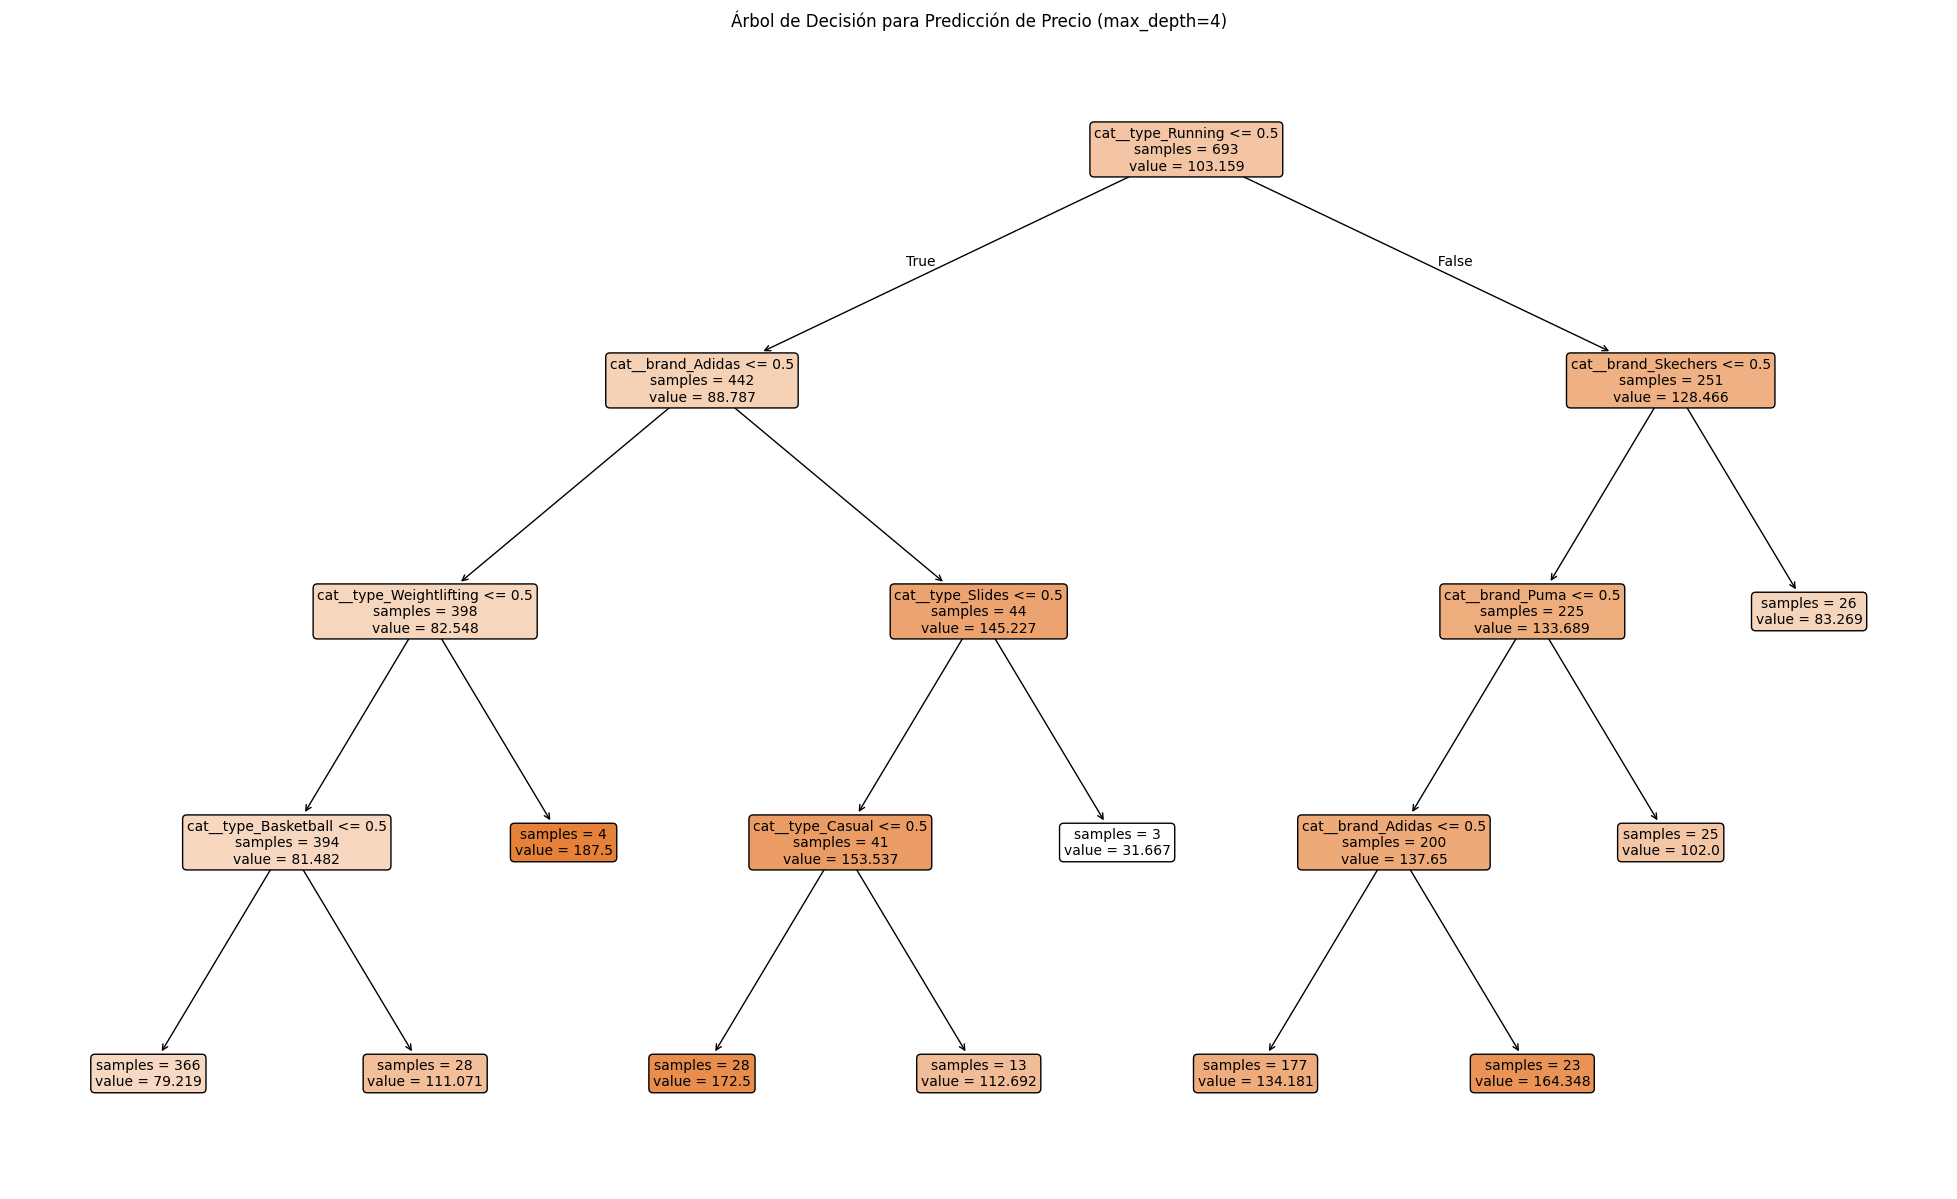


Visualización del Árbol de Decisión completada.


In [79]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pandas as pd # Asegurarse de que pandas esté importado

# Asegurarse de que el modelo tree_regressor y el DataFrame X_tree_encoded_df estén disponibles
if 'tree_regressor' not in locals() and 'tree_regressor' not in globals():
    print("El modelo 'tree_regressor' no fue encontrado. Asegúrese de que la celda de entrenamiento del modelo ('7a39a1ed') se haya ejecutado correctamente.")
elif 'X_tree_encoded_df' not in locals() and 'X_tree_encoded_df' not in globals():
     print("DataFrame 'X_tree_encoded_df' no encontrado. Asegúrese de que la celda de preparación de datos ('7dd66581') se haya ejecutado correctamente.")
else:
    print("Modelo tree_regressor y X_tree_encoded_df encontrados. Visualizando el árbol...")

    # Obtener los nombres de las características del DataFrame codificado
    feature_names = X_tree_encoded_df.columns.tolist()

    # --- Visualizar el Árbol de Decisión ---
    plt.figure(figsize=(25, 15)) # Ajusta el tamaño de la figura para una mejor visualización
    plot_tree(
        tree_regressor,
        feature_names=feature_names, # Nombres de las características
        filled=True,                # Rellenar los nodos con color para indicar el valor predicho
        rounded=True,               # Bordes redondeados para los nodos
        fontsize=10,                 # Tamaño de la fuente en los nodos
        proportion=False,            # No mostrar las proporciones de muestras, sino la cuenta
        node_ids=False,              # No mostrar los IDs de los nodos
        impurity=False,             # No mostrar la impureza en cada nodo
        # class_names=...           # No aplicable para regresión
    )

    plt.title('Árbol de Decisión para Predicción de Precio (max_depth=4)')
    plt.show()

    print("\nVisualización del Árbol de Decisión completada.")

    # Opcional: También podemos analizar la importancia de las características
    # print("\nImportancia de las Características según el Árbol de Decisión:")
    # feature_importances = pd.Series(tree_regressor.feature_importances_, index=feature_names)
    # display(feature_importances.sort_values(ascending=False))

# Lectura de los valores en el Árbol de Decisión

Los valores mostrados en los nodos del árbol de decisión contienen información clave sobre cómo el modelo realiza sus divisiones:

Primera línea: corresponde a la condición de división (por ejemplo, cat__type_Running <= 0.5), que separa los datos según una característica específica.

samples: indica la cantidad de observaciones (zapatos) que llegan a ese nodo.

value: representa el precio promedio de las observaciones dentro de ese nodo.

En el nodo raíz (el más alto), se muestra el total de observaciones del dataset (por ejemplo, samples: 693) y el precio promedio general (value) de todos los zapatos analizados.
A medida que el árbol se divide, los nodos subsiguientes muestran cómo esas condiciones van segmentando el conjunto en grupos más pequeños con diferentes precios promedio.

In [81]:
import pandas as pd

# Asegurarse de que el modelo tree_regressor y el DataFrame X_tree_encoded_df estén disponibles
if 'tree_regressor' not in locals() and 'tree_regressor' not in globals():
    print("El modelo 'tree_regressor' no fue encontrado. Asegúrese de que la celda de entrenamiento del modelo ('7a39a1ed') se haya ejecutado correctamente.")
elif 'X_tree_encoded_df' not in locals() and 'X_tree_encoded_df' not in globals():
     print("DataFrame 'X_tree_encoded_df' no encontrado. Asegúrese de que la celda de preparación de datos ('7dd66581') se haya ejecutado correctamente.")
else:
    print("Modelo tree_regressor y X_tree_encoded_df encontrados. Analizando importancia de características...")

    # Obtener la importancia de las características del modelo entrenado
    feature_importances = tree_regressor.feature_importances_

    # Obtener los nombres de las características del DataFrame codificado
    feature_names = X_tree_encoded_df.columns.tolist()

    # Crear una Serie de Pandas para visualizar la importancia de manera ordenada
    feature_importances_series = pd.Series(feature_importances, index=feature_names)

    # Ordenar las características por importancia de mayor a menor
    feature_importances_sorted = feature_importances_series.sort_values(ascending=False)

    print("\n📊 Importancia de las Características según el Árbol de Decisión:")
    display(feature_importances_sorted)

    # Opcional: Visualizar la importancia de las características en un gráfico
    # plt.figure(figsize=(10, 6))
    # feature_importances_sorted.head(10).plot(kind='barh') # Mostrar las top 10 en un gráfico horizontal
    # plt.title('Top 10 Importancia de Características (Árbol de Decisión)')
    # plt.xlabel('Importancia')
    # plt.ylabel('Característica Codificada')
    # plt.gca().invert_yaxis() # Invertir el eje y para que la más importante esté arriba
    # plt.show()

Modelo tree_regressor y X_tree_encoded_df encontrados. Analizando importancia de características...

📊 Importancia de las Características según el Árbol de Decisión:


,0
cat__type_Running,0.383113
cat__brand_Adidas,0.264755
cat__brand_Skechers,0.090059
cat__type_Weightlifting,0.067651
cat__type_Slides,0.063109
cat__type_Casual,0.048270
cat__brand_Puma,0.042929
cat__type_Basketball,0.040113
cat__brand_Reebok,0.000000
cat__brand_Fila,0.000000


Interpretación de la Importancia de las Características:

Los números que ves junto a cada nombre de característica codificada (ej. cat__type_Running 0.383113) representan cuánto contribuyó esa característica a reducir el error de predicción del precio a lo largo de la construcción del árbol.
Un valor más alto indica que la característica fue más "importante" o influyente en las decisiones de división del árbol y, por lo tanto, en la predicción del precio.
Un valor de 0.0 significa que esa característica particular (esa categoría específica de marca o tipo) no se utilizó en ninguna división del árbol (hasta la profundidad máxima especificada).
Hallazgos clave en tu resultado:

Observando la lista ordenada de importancia:

cat__type_Running (0.383113): La característica más importante con diferencia es si el zapato es del tipo "Running". Esto refuerza lo que vimos en el análisis exploratorio y en el árbol visualizado: ser un zapato "Running" tiene un gran impacto en el precio predicho por el árbol.
cat__brand_Adidas (0.264755): La marca Adidas aparece como la segunda característica más importante. Esto sugiere que ser de la marca Adidas también es un factor muy influyente en el precio predicho por el árbol.
cat__brand_Skechers (0.090059): La marca Skechers es la tercera más importante.
cat__type_Weightlifting (0.067651), cat__type_Slides (0.063109), cat__type_Casual (0.048270), cat__brand_Puma (0.042929), cat__type_Basketball (0.040113): Estos otros tipos de calzado y marcas también muestran cierta importancia, aunque menor que 'Running' y 'Adidas'.
Muchas características con 0.0: Varias categorías de marca y tipo tienen una importancia de 0.0. Esto significa que, dentro de las divisiones realizadas por este árbol con max_depth=4, esas categorías específicas no fueron elegidas como el mejor criterio para dividir los datos en ningún nodo. No significa que no tengan ninguna relación con el precio, sino que su influencia fue menor que otras características en el contexto de este árbol particular.
Vínculo con la Hipótesis:

Este análisis de importancia de características apoya tu hipótesis al mostrar que el Tipo de Calzado (especialmente 'Running') y la Marca (especialmente 'Adidas' y 'Skechers') son, según este modelo, los factores más influyentes en la predicción del precio, incluso sin incluir la información directa sobre el material. La alta importancia del tipo 'Running' sugiere que los calzados orientados al rendimiento tienen un peso significativo en la determinación del precio, lo cual se alinea con tu hipótesis.

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd # Asegurarse de que pandas esté importado

# Asegurarse de que los DataFrames X_tree_encoded_df y y_tree estén disponibles
if 'X_tree_encoded_df' not in locals() and 'X_tree_encoded_df' not in globals():
    print("DataFrame 'X_tree_encoded_df' no encontrado. Asegúrese de que la celda de preparación de datos ('7dd66581') se haya ejecutado correctamente.")
    # Si no están, no podemos continuar.
    # Considera agregar un exit() o return aquí si es crítico.
elif 'y_tree' not in locals() and 'y_tree' not in globals():
     print("Serie 'y_tree' (target) no encontrada. Asegúrese de que la celda de preparación de datos ('7dd66581') se haya ejecutado correctamente.")
else:
    print("DataFrames X_tree_encoded_df y y_tree encontrados. Procediendo a dividir y evaluar.")

    # --- Dividir los datos en conjuntos de entrenamiento y prueba ---
    # Usaremos un 80% para entrenamiento y 20% para prueba, similar a la división anterior
    X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(
        X_tree_encoded_df, y_tree, test_size=0.2, random_state=42
    )

    print(f"\nDatos divididos: {X_train_tree.shape[0]} muestras para entrenamiento, {X_test_tree.shape[0]} para prueba.")

    # --- Entrenar el modelo DecisionTreeRegressor en el conjunto de entrenamiento ---
    # Re-inicializamos el modelo (o usamos el entrenado si queremos, pero es más limpio entrenar en el split)
    # Usaremos la misma profundidad máxima (max_depth=4) para consistencia con la visualización
    tree_regressor_eval = DecisionTreeRegressor(max_depth=4, random_state=42)

    print(f"\nEntrenando modelo DecisionTreeRegressor (para evaluación) con max_depth={tree_regressor_eval.max_depth} en el conjunto de entrenamiento...")
    tree_regressor_eval.fit(X_train_tree, y_train_tree)

    print("Modelo entrenado en el conjunto de entrenamiento.")

    # --- Realizar Predicciones en el conjunto de prueba ---
    print("\nRealizando predicciones en el conjunto de prueba...")
    y_pred_tree = tree_regressor_eval.predict(X_test_tree)

    print("Predicciones realizadas.")

    # --- Calcular Métricas de Evaluación de Regresión ---

    # Error Absoluto Medio (MAE)
    mae_tree = mean_absolute_error(y_test_tree, y_pred_tree)

    # Error Cuadrático Medio (MSE)
    mse_tree = mean_squared_error(y_test_tree, y_pred_tree)

    # Raíz del Error Cuadrático Medio (RMSE)
    rmse_tree = np.sqrt(mse_tree)

    # Coeficiente de Determinación (R²)
    r2_tree = r2_score(y_test_tree, y_pred_tree)

    # --- Mostrar las Métricas ---
    print("\n📊 Métricas de Evaluación del Modelo DecisionTreeRegressor en el conjunto de prueba:")
    print(f"  Error Absoluto Medio (MAE): {mae_tree:.2f}")
    print(f"  Error Cuadrático Medio (RMSE): {rmse_tree:.2f}")
    print(f"  Coeficiente de Determinación (R²): {r2_tree:.4f}")

    # Opcional: Mostrar algunas predicciones vs. valores reales
    print("\nEjemplo de Predicciones vs Valores Reales (primeras 10 del conjunto de prueba):")
    predictions_vs_actual_tree = pd.DataFrame({'Real': y_test_tree.reset_index(drop=True), 'Predicción': y_pred_tree})
    display(predictions_vs_actual_tree.head(10))

DataFrames X_tree_encoded_df y y_tree encontrados. Procediendo a dividir y evaluar.

Datos divididos: 554 muestras para entrenamiento, 139 para prueba.

Entrenando modelo DecisionTreeRegressor (para evaluación) con max_depth=4 en el conjunto de entrenamiento...
Modelo entrenado en el conjunto de entrenamiento.

Realizando predicciones en el conjunto de prueba...
Predicciones realizadas.

📊 Métricas de Evaluación del Modelo DecisionTreeRegressor en el conjunto de prueba:
  Error Absoluto Medio (MAE): 21.50
  Error Cuadrático Medio (RMSE): 28.04
  Coeficiente de Determinación (R²): 0.5059

Ejemplo de Predicciones vs Valores Reales (primeras 10 del conjunto de prueba):


,Real,Predicción
0,75.0,79.211536
1,100.0,79.211536
2,85.0,79.211536
3,75.0,79.211536
4,80.0,79.211536
5,130.0,113.500000
6,75.0,79.211536
7,120.0,135.035714
8,65.0,79.211536
9,120.0,135.035714


In [84]:
import pandas as pd

# Asegurarse de que df_cleaned_price esté disponible
if 'df_cleaned_price' not in locals() and 'df_cleaned_price' not in globals():
    print("DataFrame 'df_cleaned_price' no encontrado. Asegúrese de que la celda de carga y limpieza inicial del precio se haya ejecutado correctamente.")
    # Considerar cargar/limpiar df aquí si es necesario o salir
    # Por simplicidad, mostramos un mensaje y no ejecutamos el resto si df_cleaned_price no está disponible
else:
    print("DataFrame 'df_cleaned_price' encontrado. Procediendo con el análisis de Material y Precio.")

    # Convertir el nombre de la columna de precio a un formato fácil de usar si no se ha hecho
    # Esto ya se hizo en pasos anteriores, pero lo aseguramos aquí si se ejecuta de forma independiente
    if 'Price (USD)' in df_cleaned_price.columns:
        df_cleaned_price['price_usd'] = df_cleaned_price['Price (USD)']
    elif 'price_usd' not in df_cleaned_price.columns:
         # Si no está ni el original ni el limpio, algo anda mal
         print("Columna de precio no encontrada en formatos esperados.")
         exit()


    # --- Análisis de Precio Promedio por Material ---
    print("\n📊 Precio Promedio por Material:")
    average_price_by_material = df_cleaned_price.groupby('Material')['price_usd'].mean().sort_values(ascending=False).reset_index()
    display(average_price_by_material)

    # --- Análisis de Precio Promedio por Tipo y Material (filtrando por tipos deportivos) ---
    # Identificar tipos que consideramos "deportivos" basándonos en el análisis exploratorio
    sports_types = ['Running', 'Basketball', 'Training', 'Crossfit', 'Cross-training', 'Trail', 'Weightlifting', 'Racing', 'Trail Running', 'CrossFit'] # Añadir CrossFit si aparece por duplicado

    # Filtrar el DataFrame para incluir solo tipos deportivos
    df_sports = df_cleaned_price[df_cleaned_price['Type'].isin(sports_types)].copy()

    if not df_sports.empty:
        print(f"\n📊 Precio Promedio por Tipo Deportivo y Material (solo tipos: {sports_types}):")
        # Agrupar por Tipo y Material y calcular el precio promedio
        average_price_sports_type_material = df_sports.groupby(['Type', 'Material'])['price_usd'].mean().sort_values(ascending=False).reset_index()
        display(average_price_sports_type_material)

        # Opcional: Agrupar solo por Material dentro de los tipos deportivos
        print("\n📊 Precio Promedio por Material (solo en tipos deportivos):")
        average_price_material_in_sports = df_sports.groupby('Material')['price_usd'].mean().sort_values(ascending=False).reset_index()
        display(average_price_material_in_sports)

    else:
        print("\nNo se encontraron registros para los tipos deportivos especificados para analizar por Material.")

DataFrame 'df_cleaned_price' encontrado. Procediendo con el análisis de Material y Precio.

📊 Precio Promedio por Material:


,Material,price_usd
0,Primeknit/Synthetic,220.000000
1,Mesh/Leather,180.000000
2,Primeknit,167.058824
3,Flyknit,158.823529
4,Mesh/Synthetic,133.333333
5,Textile/Leather,130.000000
6,Textile,130.000000
7,Flexweave/Cushioning,130.000000
8,Flexweave/Synthetic,130.000000
9,Flexweave,130.000000



📊 Precio Promedio por Tipo Deportivo y Material (solo tipos: ['Running', 'Basketball', 'Training', 'Crossfit', 'Cross-training', 'Trail', 'Weightlifting', 'Racing', 'Trail Running', 'CrossFit']):


,Type,Material,price_usd
0,Weightlifting,Leather,200.000000
1,Running,Mesh/Leather,180.000000
2,Weightlifting,Synthetic,175.000000
3,Running,Suede/Mesh,175.000000
4,Running,Synthetic/Leather,170.000000
5,Running,Leather/Synthetic,170.000000
6,Running,Primeknit,168.000000
7,Running,Synthetic,160.000000
8,Running,Flyknit,158.823529
9,Running,Leather,145.000000



📊 Precio Promedio por Material (solo en tipos deportivos):


,Material,price_usd
0,Mesh/Leather,180.000000
1,Suede/Mesh,175.000000
2,Synthetic/Leather,170.000000
3,Primeknit,168.000000
4,Flyknit,158.823529
5,Leather/Synthetic,145.714286
6,Synthetic,140.000000
7,Mesh/Synthetic,133.235294
8,Textile,130.000000
9,Synthetic/Textile,130.000000


from matplotlib import pyplot as plt
average_price_by_material['price_usd'].plot(kind='hist', bins=20, title='price_usd')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
average_price_by_material['price_usd'].plot(kind='line', figsize=(8, 4), title='price_usd')
plt.gca().spines[['top', 'right']].set_visible(False)

# Analisis Hipótesis 2

La Hipótesis 2 postula que los calzados deportivos que incorporan materiales 'premium' o de alta tecnología tendrán precios promedio significativamente más altos que aquellos con materiales convencionales, sugiriendo una influencia directa del uso orientado al rendimiento y la calidad del material en el precio.

Basándonos en el análisis del precio promedio por material y por tipo deportivo y material, observamos lo siguiente:

*   **Materiales 'Premium' y Precio Promedio General:** Materiales como 'Primeknit/Synthetic', 'Mesh/Leather', 'Primeknit', y 'Flyknit' muestran consistentemente los precios promedio más altos en el dataset general. Esto sugiere una asociación entre estos materiales y un posicionamiento de precio superior.

*   **Materiales y Precio en Calzado Deportivo:** Al enfocarnos solo en los tipos de calzado deportivo, la asociación entre ciertos materiales y precios más altos se mantiene. Materiales como 'Mesh/Leather', 'Suede/Mesh', 'Synthetic/Leather', 'Primeknit', y 'Flyknit' se encuentran entre los que tienen los precios promedio más elevados dentro de esta categoría. Esto respalda la idea de que la elección del material es un factor influyente en el precio de los zapatos deportivos.

*   **Tipo Deportivo como Factor Clave:** Adicionalmente, nuestro análisis de importancia de características con el Árbol de Decisión mostró que el **Tipo de Calzado** (especialmente 'Running' y 'Basketball') es un predictor muy importante del precio. Esto complementa la hipótesis, indicando que no es solo el material, sino también el uso específico (deportivo de alto rendimiento) lo que contribuye al posicionamiento de precio.

**Conclusión Final sobre la Hipótesis 2:**

Los resultados del análisis **tienden a respaldar la Hipótesis 2**. Existe una clara correlación positiva entre ciertos materiales que podrían considerarse 'premium' o de alta tecnología (como Primeknit, Flyknit, combinaciones de cuero y malla/sintético) y precios promedio más altos, particularmente dentro del segmento de calzado deportivo. Esto, combinado con la confirmación de que el tipo de calzado deportivo en sí mismo es un predictor significativo del precio, sugiere que tanto el uso previsto (deportivo/rendimiento) como la calidad percibida del material juegan roles importantes en la determinación del precio de los zapatos en este mercado. Los materiales de gama alta parecen permitir un posicionamiento de precio superior en las líneas deportivas.

# Conclusión Final del Trabajo

El análisis exploratorio y descriptivo del dataset Shoe Prices ha permitido obtener una visión integral del mercado de calzado, validando las hipótesis planteadas y revelando patrones y tendencias clave.

**Hallazgos Principales:**

*   **Estructura del Mercado y Tipos de Calzado:**
 El mercado presenta una clara concentración en los segmentos Running y Casual, que representan más de la mitad de la oferta. Esto subraya la importancia estratégica de estas categorías. Existen nichos de mercado más pequeños (como Skate, Fashion, Lifestyle, y tipos deportivos especializados) que, aunque con menor volumen, ofrecen oportunidades de diferenciación.
*   **Estrategias de Marca:**
 mLas marcas adoptan diversas estrategias en cuanto a la amplitud de su portafolio. La mayoría se concentra en ofrecer una alta diversidad de modelos, mientras que otras optan por enfoques más acotados, focalizándose en nichos específicos (ej. Vans en Skate). La distribución de género varía significativamente entre marcas y tipos de calzado, indicando diferentes segmentaciones de público objetivo.
*   **Hipótesis 1 (Polarización de Precios):**
 El análisis de precios, incluyendo el histograma de distribución y los box plots segmentados por marca y tipo, respalda la hipótesis de polarización de precios. Se observa una clara tendencia donde los tipos de calzado orientados al rendimiento (Deporte) y las marcas líderes (como Nike y Adidas) tienden a posicionarse en rangos de precio superiores. Por el contrario, los tipos casuales/lifestyle se concentran en segmentos de precio medio a bajo. El modelo LightGBM, al predecir el precio con un R² de 0.6143, confirma que características como la marca y el tipo son factores significativos en la determinación del precio.
*   **Hipótesis 2 (Materiales Premium en Calzado Deportivo):**
 El análisis del precio promedio por material, especialmente dentro de los tipos deportivos, tiende a respaldar la hipótesis de que los materiales influyen en el precio. Materiales considerados 'premium' o de alta tecnología (como Primeknit, Flyknit, y ciertas combinaciones) se asocian con precios promedio más altos dentro del segmento de calzado deportivo. Esto sugiere que la combinación de un uso orientado al rendimiento y la calidad percibida del material contribuye al posicionamiento de precio.

**Conclusión General:**

 El mercado de calzado analizado es dinámico y segmentado, con una clara distinción en la oferta y el posicionamiento de precios influenciada significativamente por el tipo de calzado (uso previsto), la marca (posicionamiento y estrategia de portafolio) y, particularmente en el segmento deportivo, por los materiales utilizados. Las marcas que buscan competir exitosamente deben navegar esta compleja interacción, equilibrando la presencia en segmentos masivos con el desarrollo de líneas de mayor valor percibido a través de la especialización (tipo) y la innovación (materiales). El análisis realizado proporciona una base sólida para la toma de decisiones estratégicas, permitiendo identificar segmentos clave, entender el paisaje competitivo y alinear las estrategias de producto y precio con las demandas del mercado.